# **Data Science and Engineering Methods**

Name : Shreyas Madhusudan Dasari

NUID : 002743612

# **AutoML**

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.

# **Abstract**

The objective of this assignment was to use AutoML and a categorical target variable to create a predictive model for the diagnosis of diabetes. In the study, key independent factors that influence diabetes diagnosis were chosen, and AutoML techniques were used to train and test models for prediction accuracy. The outcomes demonstrated that the AutoML model could reasonably predict the diagnosis of diabetes. But, by utilizing more sophisticated machine learning techniques, the algorithm can be improved even further. Overall, this study shows how AutoML has the potential to be an effective tool for predictive modeling in the field of medicine.

# **DataSet**

The data set consists of :

1.   8 diagnostic measures to predict diabetes  i.e. 'cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp' - The independent variables
2.   Diabetes - The dependent variable
3.   The category of diabetes ranges from 0(No) to 1(Yes)
4.   There are a total of 390 observations


Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

* Coding professionalism?

In [499]:
#Installing all the required Libraries for the Assignment

!pip install h2o
!pip install requests
!pip install tabulate
!pip install future
!pip install "colorama>=0.3.8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [500]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as pltl
import seaborn as sns


In [501]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [502]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

0


In [503]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:33050..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpiyvikmga
  JVM stdout: /tmp/tmpiyvikmga/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpiyvikmga/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:33050
Connecting to H2O server at http://127.0.0.1:33050 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_6bj4m8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:33050
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

In [504]:
#Read the csv file

df = pd.read_csv("https://raw.githubusercontent.com/ShreyasDasari/Data-Science-and-ML/main/ML%20Data%20Cleaning%20and%20Feature%20Selection/diabetes.csv")
df.head()

patient_number  cholesterol  glucose  hdl_chol chol_hdl_ratio  age  gender  \
0               1          193       77        49            3,9   19  female   
1               2          146       79        41            3,6   19  female   
2               3          217       75        54              4   20  female   
3               4          226       97        70            3,2   20  female   
4               5          164       91        67            2,4   20  female   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      61     119  22,5          118            70     32   38   
1      60     135  26,4          108            58     33   40   
2      67     187  29,3          110            72     40   45   
3      64     114  19,6          122            64     31   39   
4      70     141  20,2          122            86     32   39   

  waist_hip_ratio     diabetes  
0            0,84  No diabetes  
1            0,83  No diabetes  
2            0,89  No diabetes  
3            0,79  No diabetes  
4            0,82  No diabetes

# **One Hot Encoding**





In [505]:
#Performing One Hot Encoding on gender feature
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')
gender_encoded

gender_female  gender_male
0                1            0
1                1            0
2                1            0
3                1            0
4                1            0
..             ...          ...
385              1            0
386              1            0
387              1            0
388              1            0
389              1            0

[390 rows x 2 columns]

In [506]:
# Concatenate the encoded column with the original dataframe
df = pd.concat([df, gender_encoded], axis=1)
df.head()

patient_number  cholesterol  glucose  hdl_chol chol_hdl_ratio  age  gender  \
0               1          193       77        49            3,9   19  female   
1               2          146       79        41            3,6   19  female   
2               3          217       75        54              4   20  female   
3               4          226       97        70            3,2   20  female   
4               5          164       91        67            2,4   20  female   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      61     119  22,5          118            70     32   38   
1      60     135  26,4          108            58     33   40   
2      67     187  29,3          110            72     40   45   
3      64     114  19,6          122            64     31   39   
4      70     141  20,2          122            86     32   39   

  waist_hip_ratio     diabetes  gender_female  gender_male  
0            0,84  No diabetes              1            0  
1            0,83  No diabetes              1            0  
2            0,89  No diabetes              1            0  
3            0,79  No diabetes              1            0  
4            0,82  No diabetes              1            0

In [507]:
#Converting diabetes feature into 0 and 1
df['is_diab'] = df['diabetes'].map({'Diabetes':1,'No diabetes':0})
df['is_diab']
df.head()

patient_number  cholesterol  glucose  hdl_chol chol_hdl_ratio  age  gender  \
0               1          193       77        49            3,9   19  female   
1               2          146       79        41            3,6   19  female   
2               3          217       75        54              4   20  female   
3               4          226       97        70            3,2   20  female   
4               5          164       91        67            2,4   20  female   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      61     119  22,5          118            70     32   38   
1      60     135  26,4          108            58     33   40   
2      67     187  29,3          110            72     40   45   
3      64     114  19,6          122            64     31   39   
4      70     141  20,2          122            86     32   39   

  waist_hip_ratio     diabetes  gender_female  gender_male  is_diab  
0            0,84  No diabetes              1            0        0  
1            0,83  No diabetes              1            0        0  
2            0,89  No diabetes              1            0        0  
3            0,79  No diabetes              1            0        0  
4            0,82  No diabetes              1            0        0

In [508]:
#Dropping irrelevant fields
df.drop(['patient_number','chol_hdl_ratio','bmi','waist_hip_ratio','gender','diabetes'],inplace=True, axis=1)
df.head()

cholesterol  glucose  hdl_chol  age  height  weight  systolic_bp  \
0          193       77        49   19      61     119          118   
1          146       79        41   19      60     135          108   
2          217       75        54   20      67     187          110   
3          226       97        70   20      64     114          122   
4          164       91        67   20      70     141          122   

   diastolic_bp  waist  hip  gender_female  gender_male  is_diab  
0            70     32   38              1            0        0  
1            58     33   40              1            0        0  
2            72     40   45              1            0        0  
3            64     31   39              1            0        0  
4            86     32   39              1            0        0

In [509]:
#Description of the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cholesterol    390 non-null    int64
 1   glucose        390 non-null    int64
 2   hdl_chol       390 non-null    int64
 3   age            390 non-null    int64
 4   height         390 non-null    int64
 5   weight         390 non-null    int64
 6   systolic_bp    390 non-null    int64
 7   diastolic_bp   390 non-null    int64
 8   waist          390 non-null    int64
 9   hip            390 non-null    int64
 10  gender_female  390 non-null    uint8
 11  gender_male    390 non-null    uint8
 12  is_diab        390 non-null    int64
dtypes: int64(11), uint8(2)
memory usage: 34.4 KB


In [510]:
#Checking if the dataset has missing values
df.isnull().sum()

cholesterol      0
glucose          0
hdl_chol         0
age              0
height           0
weight           0
systolic_bp      0
diastolic_bp     0
waist            0
hip              0
gender_female    0
gender_male      0
is_diab          0
dtype: int64

In [511]:
#Checking the dataset size
df.shape

(390, 13)

In [512]:
#Description of the dataset
df.describe()

cholesterol     glucose    hdl_chol         age      height  \
count   390.000000  390.000000  390.000000  390.000000  390.000000   
mean    207.230769  107.338462   50.266667   46.774359   65.951282   
std      44.666005   53.798188   17.279069   16.435911    3.918867   
min      78.000000   48.000000   12.000000   19.000000   52.000000   
25%     179.000000   81.000000   38.000000   34.000000   63.000000   
50%     203.000000   90.000000   46.000000   44.500000   66.000000   
75%     229.000000  107.750000   59.000000   60.000000   69.000000   
max     443.000000  385.000000  120.000000   92.000000   76.000000   

           weight  systolic_bp  diastolic_bp       waist         hip  \
count  390.000000   390.000000    390.000000  390.000000  390.000000   
mean   177.407692   137.133333     83.289744   37.869231   42.992308   
std     40.407824    22.859528     13.498192    5.760947    5.664342   
min     99.000000    90.000000     48.000000   26.000000   30.000000   
25%    150.250000   122.000000     75.000000   33.000000   39.000000   
50%    173.000000   136.000000     82.000000   37.000000   42.000000   
75%    200.000000   148.000000     90.000000   41.000000   46.000000   
max    325.000000   250.000000    124.000000   56.000000   64.000000   

       gender_female  gender_male     is_diab  
count     390.000000   390.000000  390.000000  
mean        0.584615     0.415385    0.153846  
std         0.493421     0.493421    0.361265  
min         0.000000     0.000000    0.000000  
25%         0.000000     0.000000    0.000000  
50%         1.000000     0.000000    0.000000  
75%         1.000000     1.000000    0.000000  
max         1.000000     1.000000    1.000000

1. A dataset with 390 observations and 13 variables is summarized in this table.

2. The "mean" row displays the average value of each variable, while the "count" row displays the total number of observations for each variable.

3. Each variable's standard deviation, a gauge of how much the values deviate from the mean, is displayed in the "std" row.

4. The "min" and "max" rows display the variables' smallest and maximum values, respectively.

5. The values at the 25th, 50th, and 75th percentiles of the distribution are displayed in the "25%", "50%," and "75%" rows, respectively.

6. The 25th percentile is the value below which 25% of the observations fall, and so on. These percentiles divide the observations into quarters.

<AxesSubplot:>

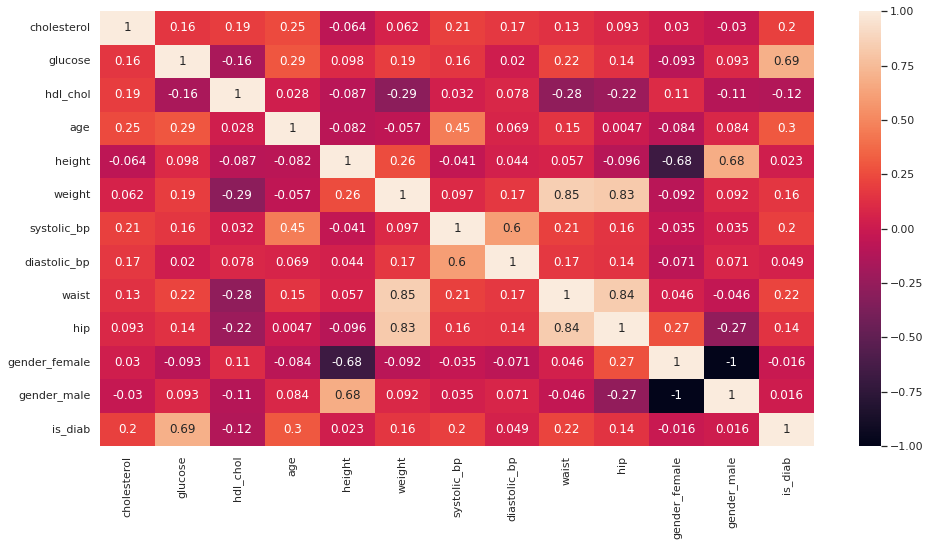

In [513]:
#Heatmap and correlation between variables in the dataset
sns.set(rc={"figure.figsize": (16, 8)})
sns.heatmap(df.corr(),annot=True)

# **Correlation Analysis**

A correlation coefficient, like the Pearson correlation coefficient, can be used to determine the correlation between two sets of variables. The range of values for this coefficient, which measures the linear relationship between two variables, is -1 (perfectly negative correlation) to 1. (perfect positive correlation). Zero means there is no correlation.

From the above heatmap we can infer:

1. Mostly all variables are independent of each other.
2. A few variables show multi-collinearity as waist, hip and weight. Also glucose and is_diab, gender_male and height closely resemble multi-collinearity as the value is close to 0.7

# **Creating a Pairplot**

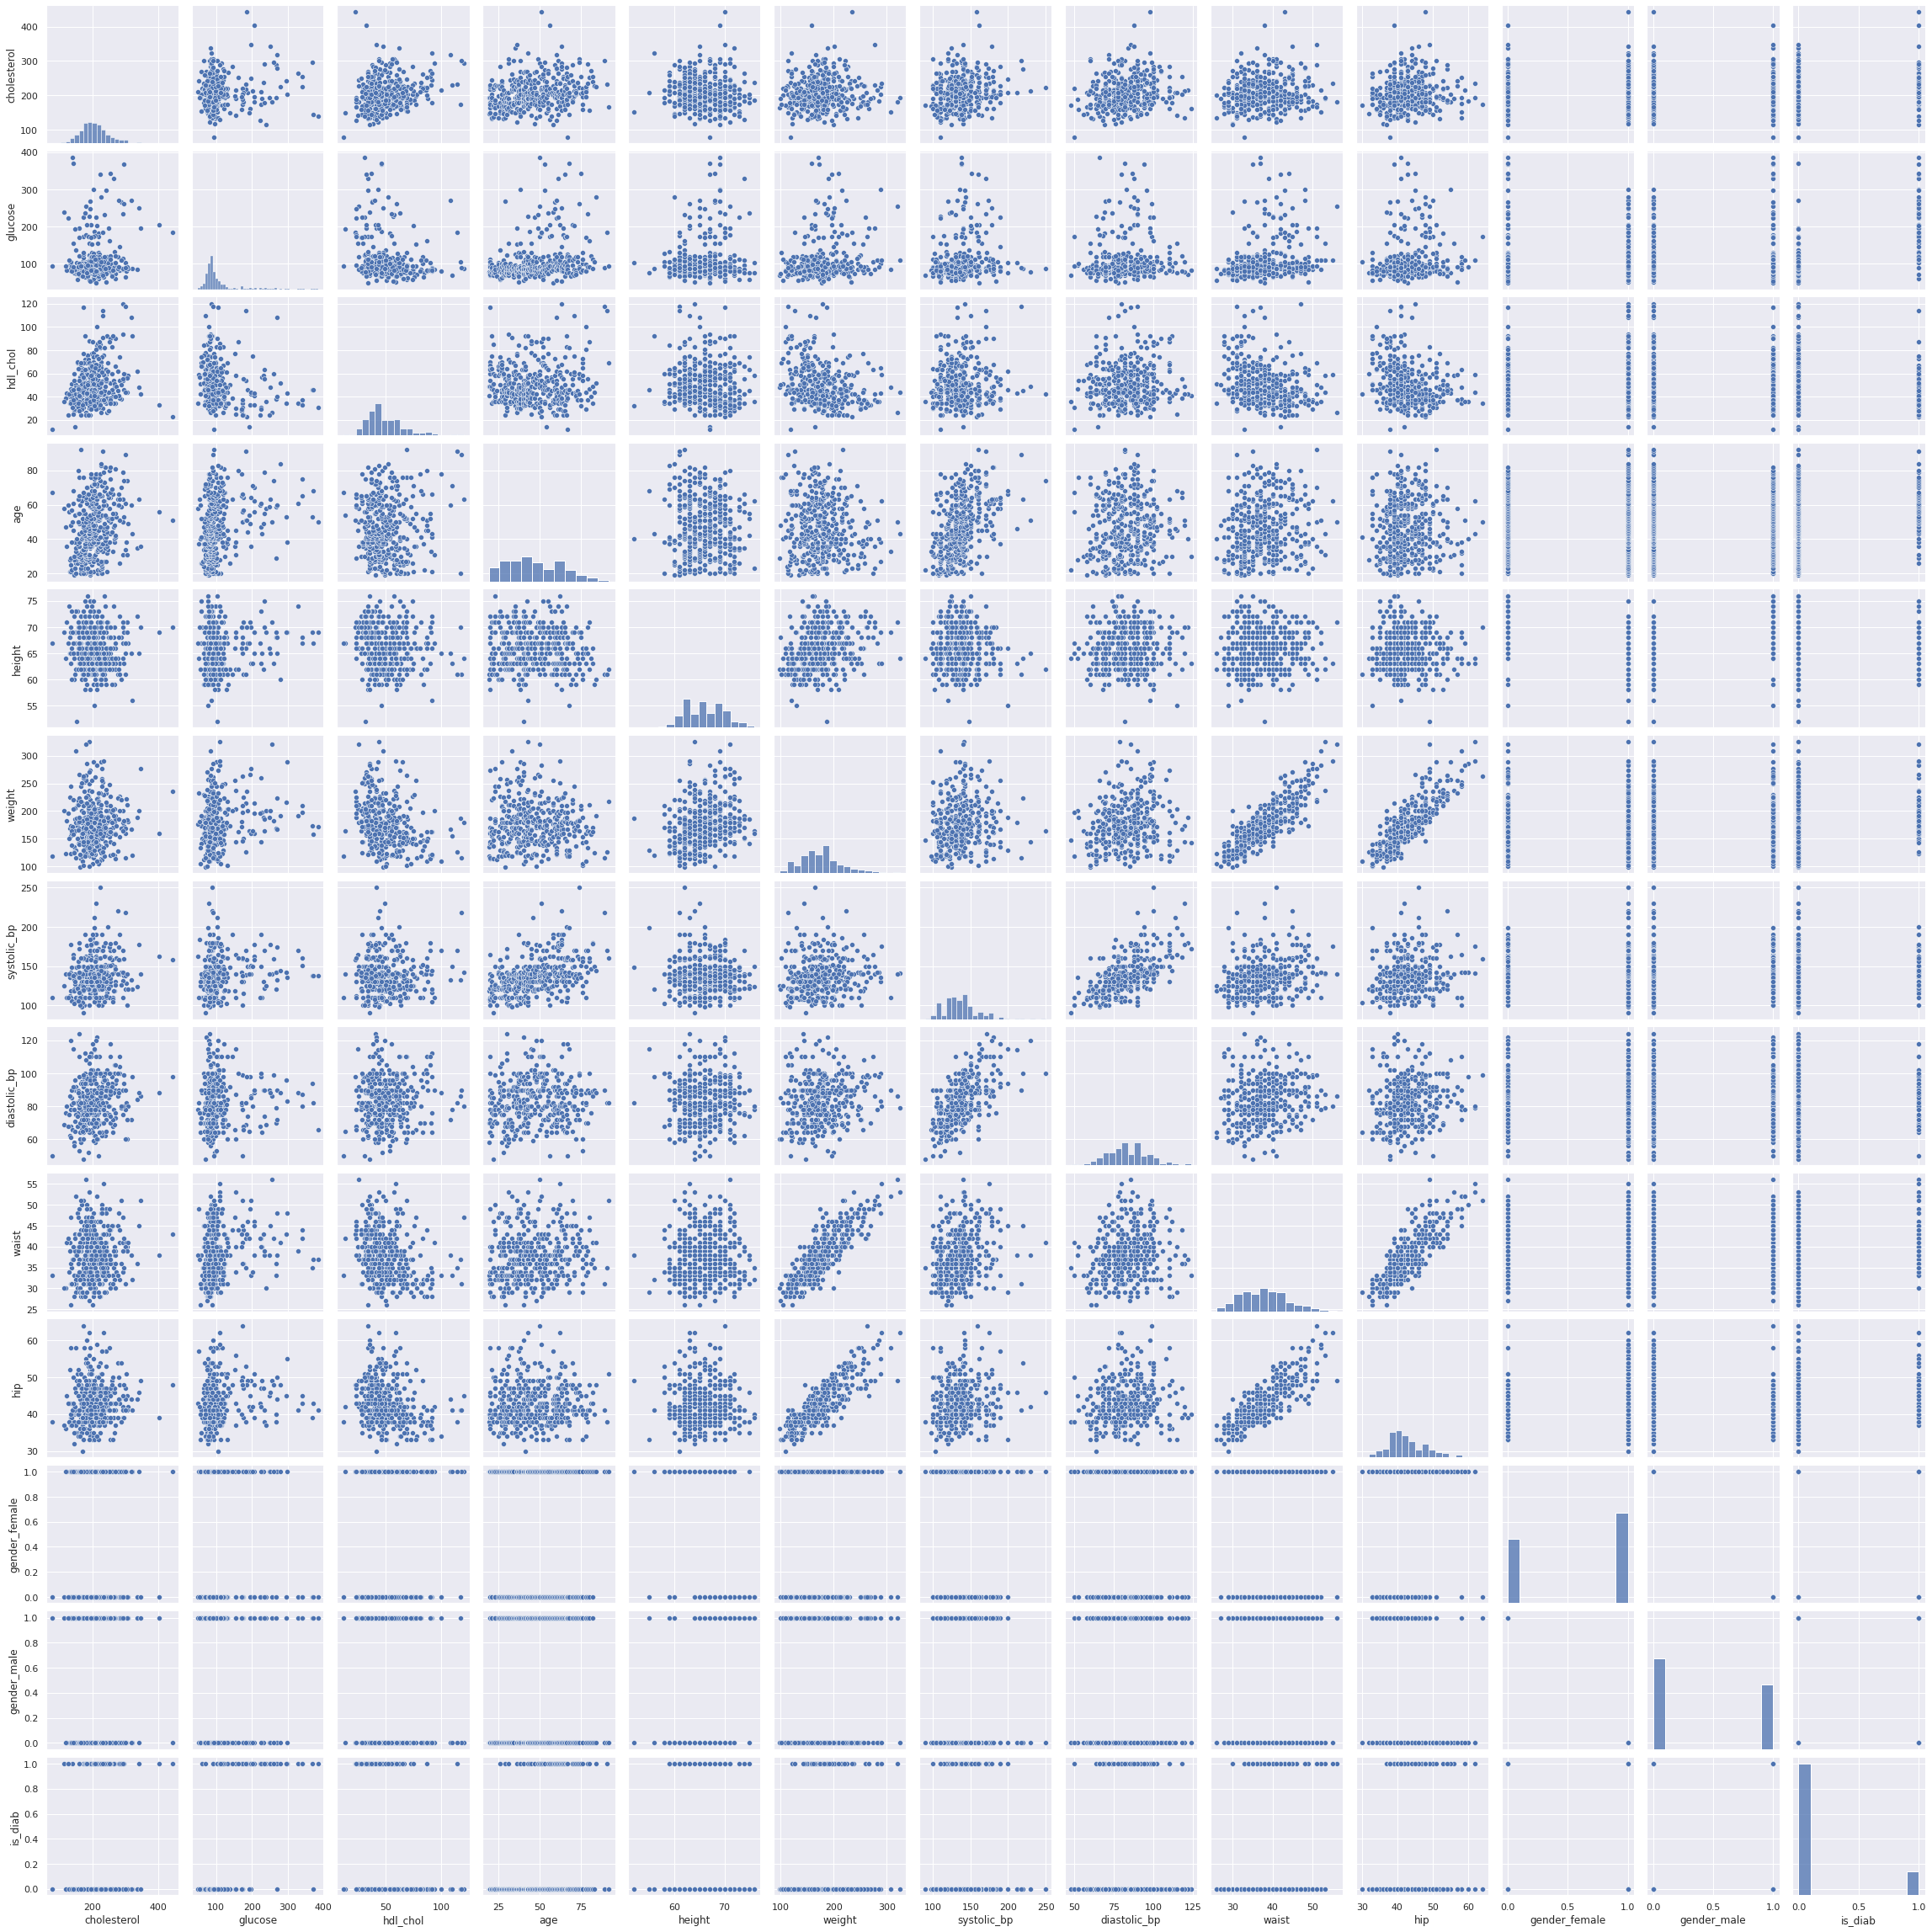

In [514]:
sns.pairplot(df)

# **Understanding the Pairplot and Analyzing Correlation between variables**

1. A pair plot shows the pairwise relationships between variables in a dataset graphically. For each pair of variables, scatter plots are shown.

2. If the histogram follows a bell curve then that particular variable follows a normal distribution and as per the above pairplot, **diastolic_bp, weight, waist** roughly follow normalization.

3. The scatter plots display the associations between different pairings of variables. When two variables are highly correlated, a strong linear relationship between them can be seen on the scatter plot. If there is no link between the variables, a random distribution of points will appear on the scatter plot. The pair plot can be used to find variables that strongly correlate positively or negatively. **Glucose with respect to other variables show random distribution**.

In [515]:
#Converting pandas dataframe to H2o dataframe

df1 = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [516]:
df1.types

{'cholesterol': 'int',
 'glucose': 'int',
 'hdl_chol': 'int',
 'age': 'int',
 'height': 'int',
 'weight': 'int',
 'systolic_bp': 'int',
 'diastolic_bp': 'int',
 'waist': 'int',
 'hip': 'int',
 'gender_female': 'int',
 'gender_male': 'int',
 'is_diab': 'int'}

In [517]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df1_train, df1_test = df1.split_frame([pct_rows])

In [518]:
# Checking the split size
print(df1_train.shape)
print(df1_test.shape)

(302, 13)
(88, 13)


In [519]:
df1_train.head()

cholesterol    glucose    hdl_chol    age    height    weight    systolic_bp    diastolic_bp    waist    hip    gender_female    gender_male    is_diab
-------------  ---------  ----------  -----  --------  --------  -------------  --------------  -------  -----  ---------------  -------------  ---------
          193         77          49     19        61       119            118              70       32     38                1              0          0
          146         79          41     19        60       135            108              58       33     40                1              0          0
          217         75          54     20        67       187            110              72       40     45                1              0          0
          164         91          67     20        70       141            122              86       32     39                1              0          0
          170         69          64     20        64       161            108              70       37     40                1              0          0
          149         77          49     20        62       115            105              82       31     37                1              0          0
          164         71          63     20        72       145            108              78       29     36                0              1          0
          179        105          60     20        58       170            140             100       34     46                1              0          0
          174        105         117     20        70       187            132              86       37     41                0              1          0
          193        106          63     20        68       274            165             110       49     58                1              0          0
[10 rows x 13 columns]

In [520]:
#Setting predictor and target variables
X = df1.columns
print(X)

['cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'gender_female', 'gender_male', 'is_diab']


In [521]:
X1 = df1[['cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'gender_female', 'gender_male']]
X1

cholesterol    glucose    hdl_chol    age    height    weight    systolic_bp    diastolic_bp    waist    hip    gender_female    gender_male
-------------  ---------  ----------  -----  --------  --------  -------------  --------------  -------  -----  ---------------  -------------
          193         77          49     19        61       119            118              70       32     38                1              0
          146         79          41     19        60       135            108              58       33     40                1              0
          217         75          54     20        67       187            110              72       40     45                1              0
          226         97          70     20        64       114            122              64       31     39                1              0
          164         91          67     20        70       141            122              86       32     39                1              0
          170         69          64     20        64       161            108              70       37     40                1              0
          149         77          49     20        62       115            105              82       31     37                1              0
          164         71          63     20        72       145            108              78       29     36                0              1
          230        112          64     20        67       159            100              90       31     39                0              1
          179        105          60     20        58       170            140             100       34     46                1              0
[390 rows x 12 columns]

In [522]:
y1 = df1['is_diab']

In [523]:
y = "is_diab"
X.remove(y)  # Removing the result from our predictors data
print(X)

['cholesterol', 'glucose', 'hdl_chol', 'age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'gender_female', 'gender_male']


In [524]:
# Setting of AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [525]:
# Converting is_diab to binary 0 and 1
df1_train["is_diab"] = df1_train["is_diab"].asfactor()

In [526]:
# Training the dataset on different models
aml.train(x=X, y=y, training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230301_14949_model_17


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 44                          9545                   4            4            4             8             16            12.6364

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.005577796654708543
RMSE: 0.07468464805238452
LogLoss: 0.039795516697175536
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4921700240664877
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      256  0    0        (0.0/256.0)
1      0    46   0        (0.0/46.0)
Total  256  46   0        (0.0/302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.49217      1         45
max f2                       0.49217      1         45
max f0point5                 0.49217      1         45
max accuracy                 0.49217      1         45
max precision                0.978534     1         0
max recall                   0.49217      1         45
max specificity              0.978534     1         0
max absolute_mcc             0.49217      1         45
max min_per_class_accuracy   0.49217      1         45
max mean_per_class_accuracy  0.49217      1         45
max tns                      0.978534     256       0
max fns                      0.978534     45        0
max fps                      0.00330345   256       292
max tps                      0.49217      46        45
max tnr                      0.978534     1         0
max fnr                      0.978534     0.978261  0
max fpr                      0.00330345   1         292
max tpr                      0.49217      1         45

Gains/Lift Table: Avg response rate: 15.23 %, avg score: 15.27 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.013245                    0.972596           6.56522  6.56522            1                0.976708    1                           0.976708            0.0869565       0.0869565                  556.522  556.522            0.0869565
2        0.0231788                   0.968027           6.56522  6.56522            1                0.968288    1                           0.9731              0.0652174       0.152174                   556.522  556.522            0.152174
3        0.0331126                   0.961837           6.56522  6.56522            1                0.962864    1                           0.970029            0.0652174       0.217391                   556.522  556.522            0.217391
4        0.0430464                   0.956522           6.56522  6.56522            1                0.959044    1                           0.967494            0.0652174       0.282609                   556.522  556.522            0.282609
5        0.0529801                   0.950445           6.56522  6.56522            1                0.952742    1                           0.964728            0.0652174       0.347826                   556.522  556.522           

# **Understanding the Parameters**

**MSE**: The average squared difference between the predicted and actual values is measured by the mean squared error, or MSE. By averaging the squared discrepancies between the expected and actual values, it is determined. It is a typical statistic for assessing how accurate regression models are. Here, MSE=0.005 which is good.

**Root Mean Squared Error (RMSE)**: The RMSE is a regularly used statistic for assessing the accuracy of regression models. It is the square root of the MSE. The model's ability to predict the actual values is gauged by the RMSE.

**MAE**: The average absolute difference between the expected and actual values is measured by the term "mean absolute error," or MAE. It is derived by averaging the absolute disparities between the values that were anticipated and those that actually occurred.

**RMSLE**: In regression models where the target variable has a broad range of values, the Root Mean Squared Logarithmic Error (RMSLE) is employed instead of the RMSE. It is determined by taking the square root of the average of the squared discrepancies between the expected and actual values' logarithms.

**Mean Residual Deviance**: The mean residual deviation is a gauge of how well a regression model fits the data. The model's degrees of freedom are used to standardize the average difference between the anticipated and actual values.

**Null Degrees of Freedom**: The null degrees of freedom are equal to the dataset's total number of observations minus 1. Given the number of parameters in the model, it represents the number of observations in the dataset that are subject to change.

**Residual Degree of Freedom**: The number of observations in the dataset less the number of model parameters is known as the residual degrees of freedom. After accounting for the number of parameters in the model, it represents the number of observations in the dataset that are still subject to change.

**Null Deviance**: The null model, or model without independent variables, exhibits the null deviation. It is the variance in the dependent variable that is not explained by the independent variable.

**Residual Deviance**: After taking into account the independent variables, a model's residual deviance is calculated. It stands for the variance in the dependent variable that the independent factors are unable to account for.

**The Akaike Information Criterion (AIC)**: It is a metric for evaluating a model's quality that takes its complexity into consideration. It is calculated as the model's negative log-likelihood multiplied by twice the number of model parameters. It is possible to compare the quality of several models using the AIC, with lower values indicating higher quality.


In [527]:
# Leaderboard displaying the effectiveness of several models on the dataset.
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_grid_1_AutoML_1_20230301_14949_model_17             0.957965   0.205117  0.796593               0.14606    0.249652  0.0623261
GBM_grid_1_AutoML_1_20230301_14949_model_12             0.957201   0.206985  0.74676                0.0914572  0.248725  0.0618642
XRT_1_AutoML_1_20230301_14949                           0.956437   0.195567  0.800368               0.0934103  0.242812  0.0589575
StackedEnsemble_AllModels_2_AutoML_1_20230301_14949     0.954823   0.193516  0.759837               0.0697181  0.241132  0.0581444
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_14949  0.954484   0.196625  0.749465               0.113196   0.241987  0.0585577
GBM_3_AutoML_1_20230301_14949                           0.954399   0.198286  0.773042               0.11931    0.244667  0.0598618
GBM_4_AutoML_1_20230301_14949                           0.953465   0.197457  0.7568

The leaderboard's models are ordered according to their auc scores, where a lower score denotes superior performance. The model with the highest auc score is shown in the top row of the leaderboard. The performance of various models can be compared using the evaluation metrics, which can then be used to choose the optimal model for a certain use case.

In the above leaderboard, best model is:
1. GBM_grid_1_AutoML_1_20230301_14949_model_17
2. GBM_grid_1_AutoML_1_20230301_14949_model_12

In [528]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'GBM_grid_1_AutoML_1_20230301_14949_model_17': 0,
 'GLM_1_AutoML_1_20230301_14949': 57}

In [529]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [530]:
#Getting the best model
best_model.algo

'gbm'

In [531]:
from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

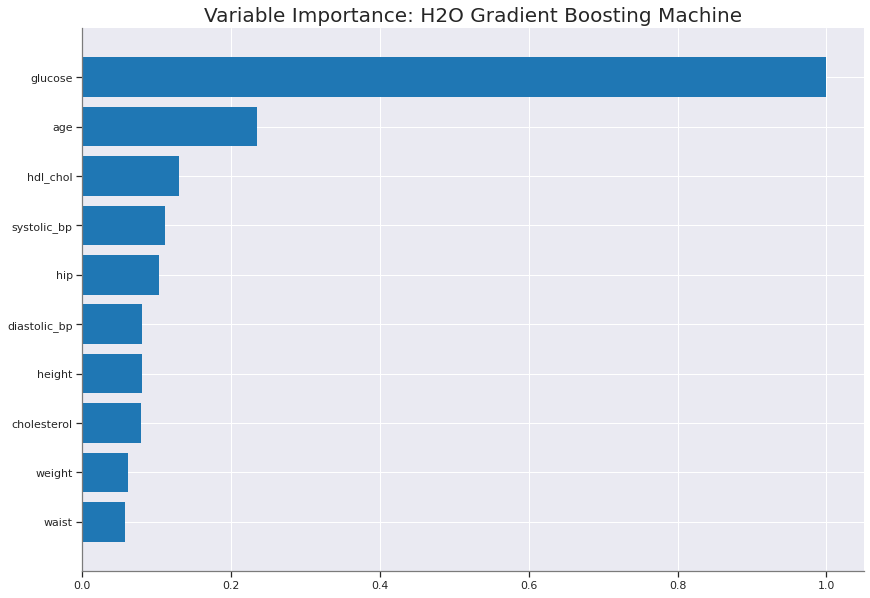

<Figure size 432x288 with 0 Axes>

In [532]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's Gradient Boosting Model.

1. Glucose seems to be the most important variable with the value 1.0
2. Rest all the variables are some what important in predict whether a patient would have diabetes or not.

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-533-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


57
glm


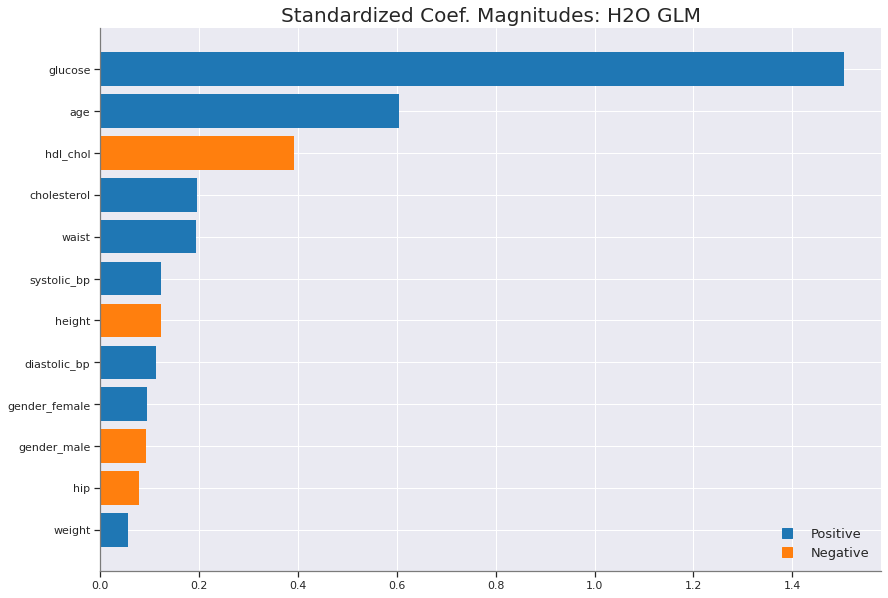

In [533]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

By normalizing all variables to have a mean of zero and a standard deviation of one, standardized coefficient magnitudes (also known as standardized coefficients or beta coefficients) are a measurement of the significance of each input variable in a predictive model. Standardized coefficient magnitudes are normally reported as percentages, but their values can vary from -infinity to infinity.

After taking into consideration the scale of the variable, the values on the standardized coefficient magnitudes show the relative relevance of each input variable in the model. A bigger impact on the outcome variable is indicated by a higher magnitude value, whilst a lesser effect is indicated by a lower value.

In [534]:
print(best_model.rmse(train=True))

0.07468464805238452


In [535]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [536]:
mod_perf = best_model.model_performance(df1_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.08958504560065919,
 'rmse': 0.29930761032867037,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.3250996009571946,
 'auc': 0.888996138996139,
 'gini': 0.7779922779922781}

In [537]:
predictions = best_model.predict(df1_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [538]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)
y_pred

    predict        p0        p1
0         0  0.995421  0.004579
1         0  0.947249  0.052751
2         0  0.995204  0.004796
3         0  0.996196  0.003804
4         0  0.993538  0.006462
..      ...       ...       ...
83        1  0.039437  0.960563
84        0  0.921502  0.078498
85        0  0.975982  0.024018
86        0  0.510805  0.489195
87        0  0.832261  0.167739

[88 rows x 3 columns]


predict        p0        p1
0         0  0.995421  0.004579
1         0  0.947249  0.052751
2         0  0.995204  0.004796
3         0  0.996196  0.003804
4         0  0.993538  0.006462
..      ...       ...       ...
83        1  0.039437  0.960563
84        0  0.921502  0.078498
85        0  0.975982  0.024018
86        0  0.510805  0.489195
87        0  0.832261  0.167739

[88 rows x 3 columns]

In [539]:
y_test = h2o.as_list(df1_test[y])  # Real Answers
y_test

is_diab
0         0
1         0
2         0
3         0
4         0
..      ...
83        1
84        0
85        0
86        0
87        0

[88 rows x 1 columns]

In [540]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df[['cholesterol', 'glucose', 'hdl_chol', 'age','height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables         VIF
0   cholesterol   26.123435
1       glucose    5.951518
2      hdl_chol   11.258917
3           age   15.131676
4        height   76.248789
5        weight   90.249764
6   systolic_bp   81.582543
7  diastolic_bp   69.423999
8         waist  230.748048
9           hip  199.217577

Variance Inflation Factor is known as VIF. It denotes multicollinearity between a group of various independent variables. A score greater than 10 indicates that the independent variable and another variable have a high correlation. The VIF value for each variable will be calculated to check for dependencies, and the variables with high VIF values will be removed.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

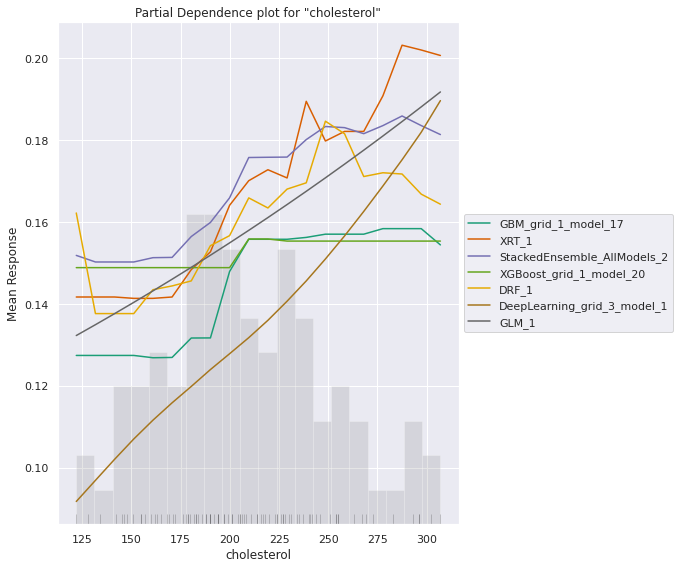

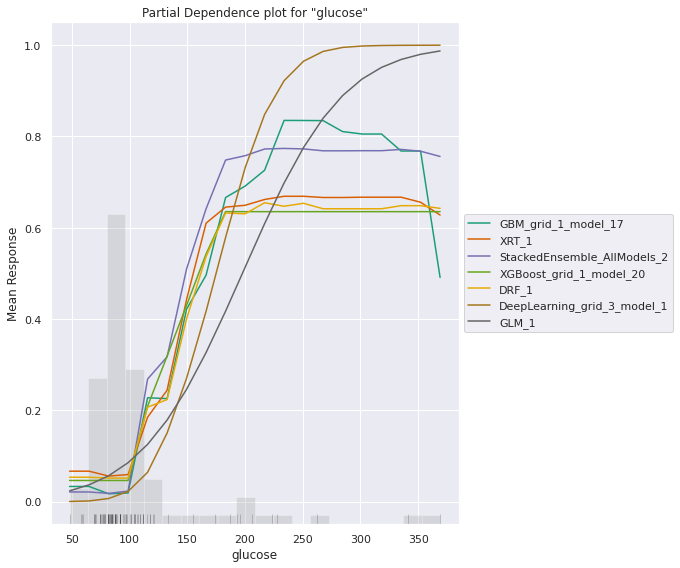

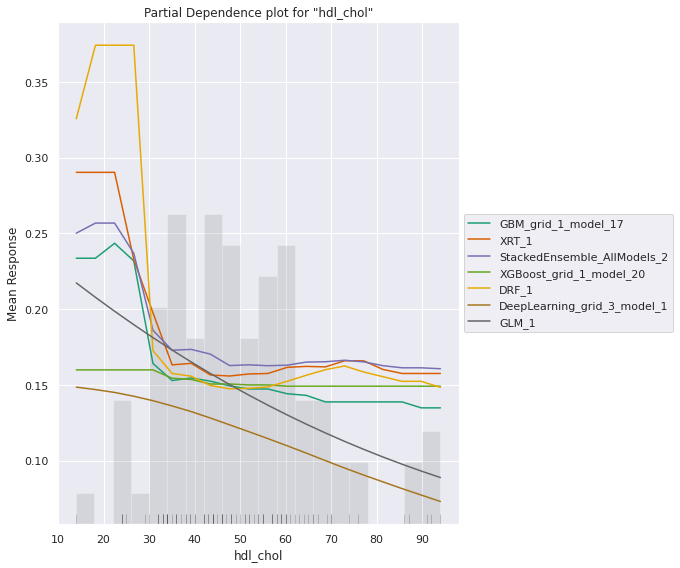

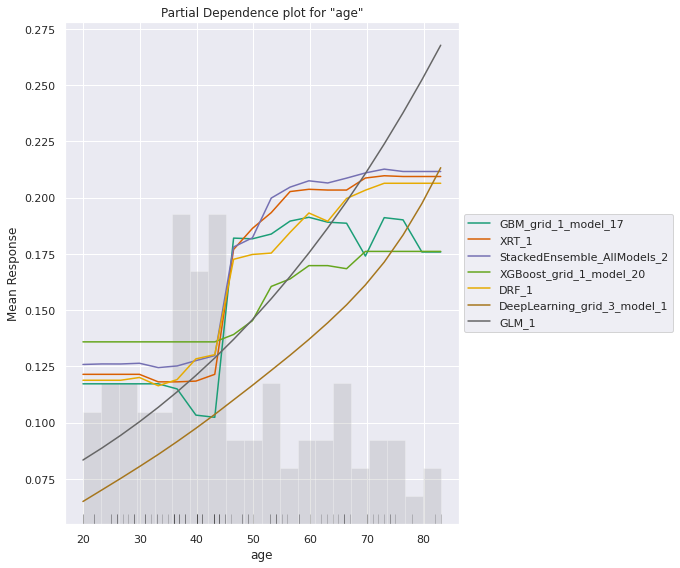

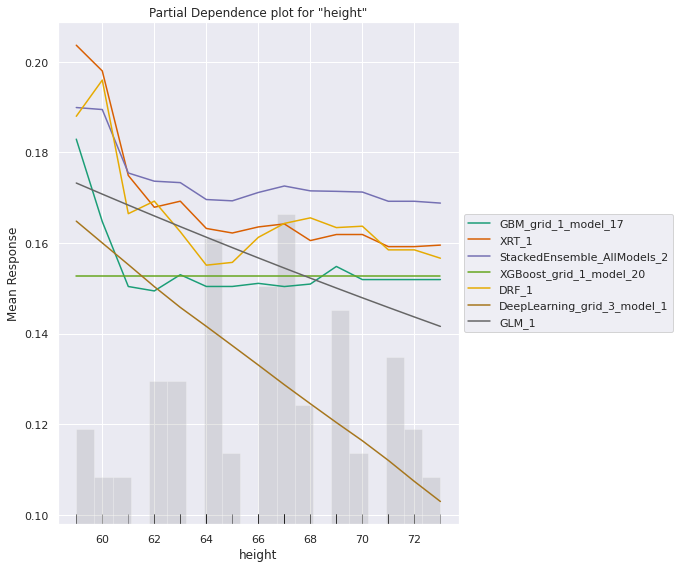

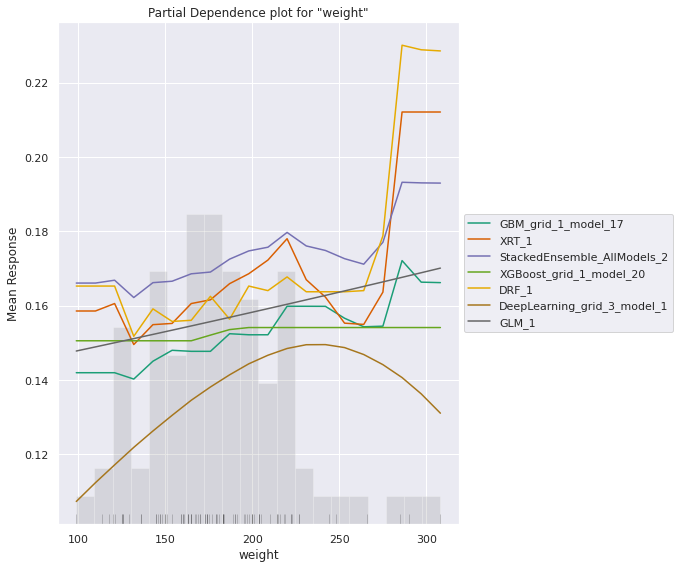

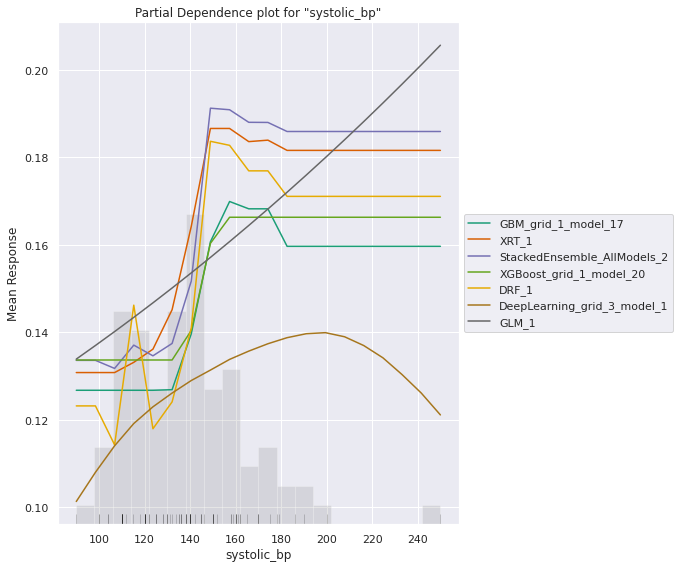

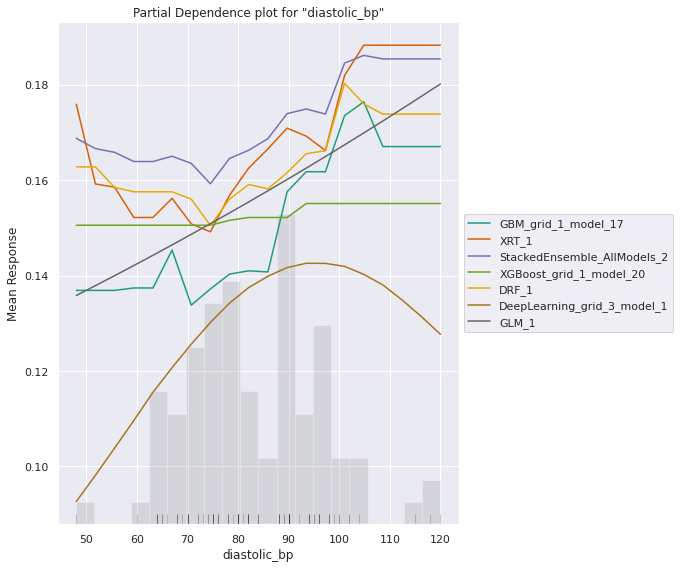

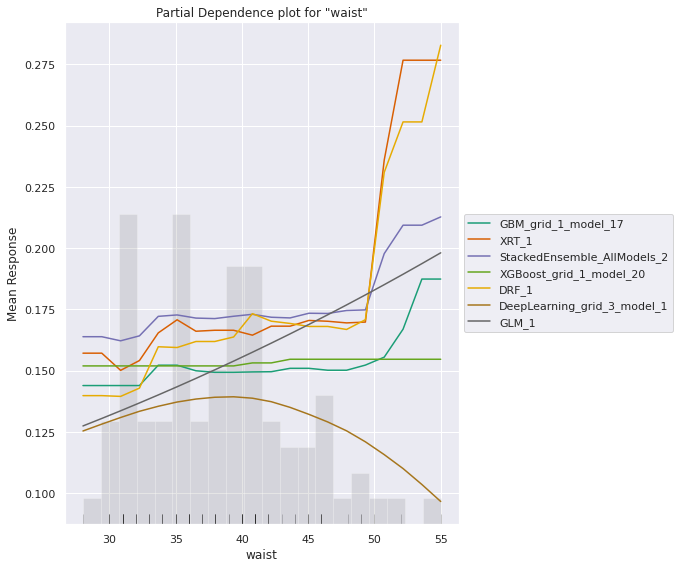

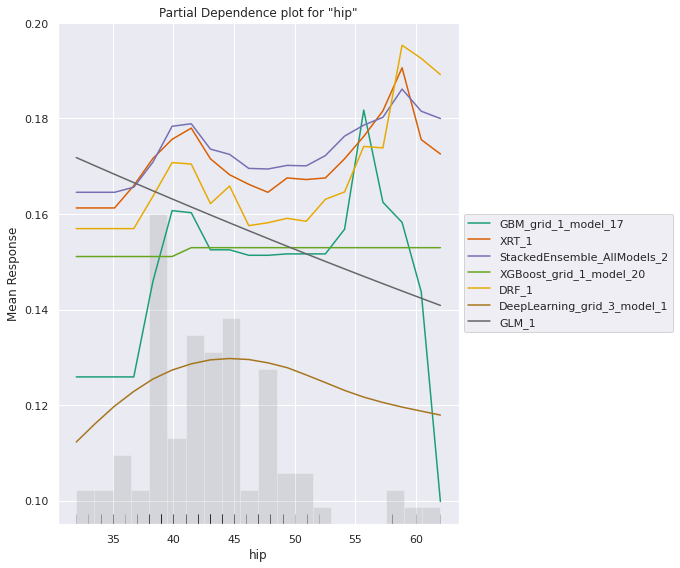

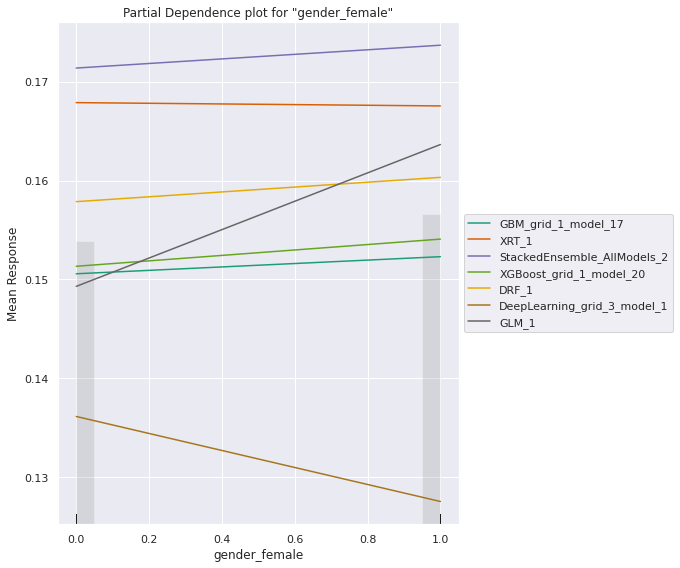

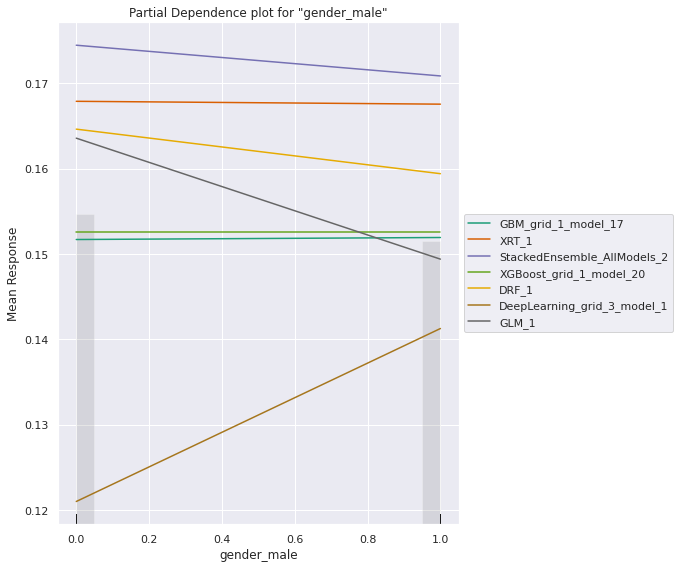

In [541]:
explain_model = aml.explain(frame = df1_test, figsize = (10,8),include_explanations=['pdp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

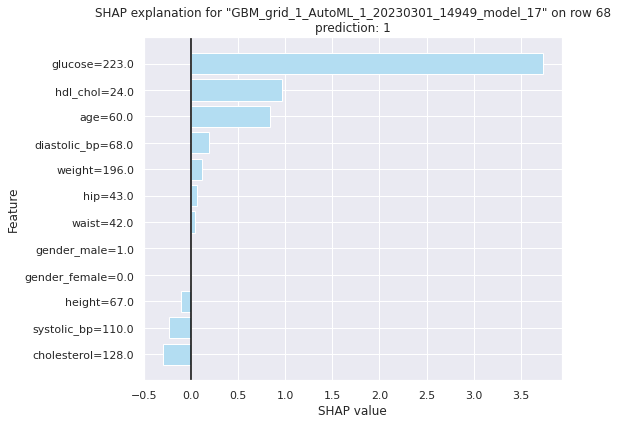

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [542]:
aml.explain_row(frame = df1_test, row_index = 68, figsize = (8,6), exclude_explanations = "leaderboard")

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

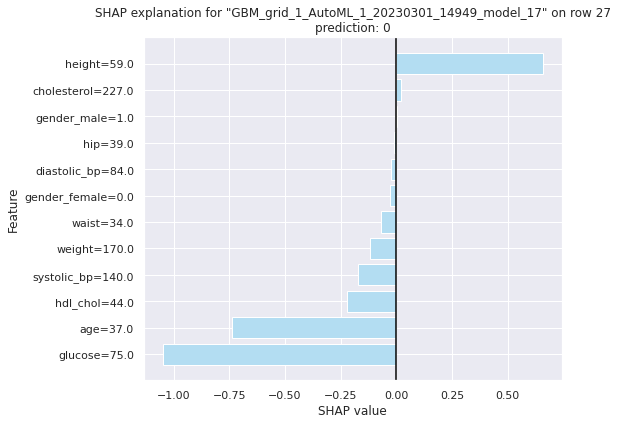

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [543]:
aml.explain_row(frame = df1_test, row_index = 27, figsize = (8,6), exclude_explanations = "leaderboard")

# **Checking if Assumptions Violated**

In [544]:
df = pd.get_dummies(df, columns=['is_diab'], drop_first=True)

In [545]:
#Seperating the predictor and target variables
A=df.drop(['is_diab_1'],axis=1)
B=df['is_diab_1']

In [546]:
#Splitting the data
from sklearn.model_selection import train_test_split 

A_train,A_test,b_train,b_test=train_test_split(A,B,test_size=0.2,random_state=42)


In [547]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

model1 = sm.OLS(b_train,sm.add_constant(A_train)).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [548]:
b_pred = model1.predict(sm.add_constant(A_train))

In [549]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -8.719520831863729e-15


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


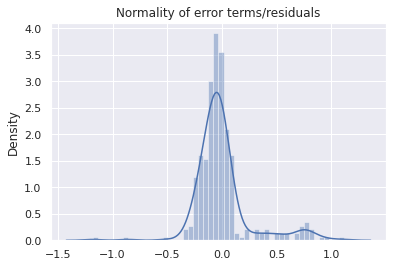

In [550]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

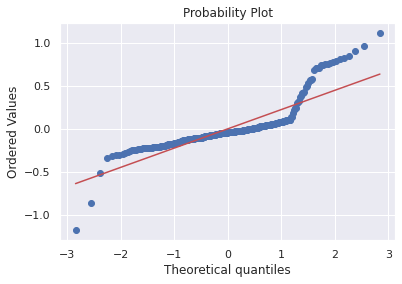

In [551]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:xlabel='is_diab_1', ylabel='Count'>

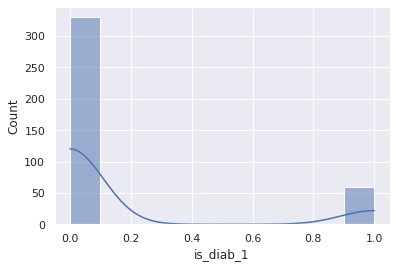

In [552]:
sns.histplot(df.is_diab_1, kde = True)

# **REGULARIZATION**

In this section, we will test if regularization aids in increasing accuracy and lowering overfitting using the GLM model.

Regularization methods like Ridge and Lasso are used in linear regression to reduce overfitting and enhance the generalizability of the model.

The least-squares objective function of the linear regression model receives a penalty component as a result of ridge regularization. This penalty term reduces the model's coefficients toward zero by having a square relationship with their magnitude. To achieve the greatest performance, the regularization parameter, a hyperparameter that controls the intensity of the penalty, must be modified.

Ridge regularization and Lasso regularization are similar, but Lasso regularization adds a penalty term proportional to the absolute value of the coefficients rather than the square of the coefficients. Lasso regularization is a valuable technique for feature selection since this penalty term has the ability to set some coefficients to exactly zero. Lasso can efficiently eliminate pointless variables from the model by setting some coefficients to zero, which can result in a model that is easier to understand and simpler.

The kind of punishment function utilized is the primary distinction between Ridge and Lasso regularization. Although Lasso employs L1 regularization, Ridge uses L2 regularization.

In [576]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from sklearn.ensemble import GradientBoostingRegressor

diabetes_glm = H2OGeneralizedLinearEstimator(family="binomial", lambda_=0, compute_p_values=True, nfolds=5, remove_collinear_columns=True)
     
diabetes_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=0, nfolds=5, compute_p_values=True, remove_collinear_columns=True
)  # RIDGE Regularization
diabetes_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=5
)  # LASSO Regularization
diabetes_glm_regularization_lambda_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

The H2O machine learning platform is used in this code to build generalized linear regression models using the Elastic Net, Ridge, Lambda_search and Lasso regularization techniques.

1. Ridge regularization is used in the first model, "diabetes glm regularization ridge." The "family" option is set to "binomial," which denotes that the model is employing a normal (binomial) error distribution and that the response variable is continuous. Ridge regularization is used by the model because the "alpha" argument is set to 0. The model is using 5-fold cross-validation to assess its performance because the "nfolds" parameter is set to 5.
2. Lasso regularization is used in the "diabetes glm regularization lasso" model. The Ridge model's "family" and "nfolds" arguments are the same, but the "alpha" argument is set to 1, which indicates the model is using Lasso regularization.

In [555]:
diabetes_glm.train(x=X, y=y, training_frame=df1_train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677635238055_10235


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              12                            11                             6                       py_1636_sid_ba5f

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.054490074873657424
RMSE: 0.2334310923455944
LogLoss: 0.1991938974916931
AUC: 0.9560971467391305
AUCPR: 0.7942457618934506
Gini: 0.912194293478261
Null degrees of freedom: 301
Residual degrees of freedom: 290
Null deviance: 257.73205844388815
Residual deviance: 120.31311408498267
AIC: 144.31311408498266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28493371205118867
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      249  7    0.0273   (7.0/256.0)
1      12   34   0.2609   (12.0/46.0)
Total  261  41   0.0629   (19.0/302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.284934     0.781609  40
max f2                       0.191366     0.805785  57
max f0point5                 0.535019     0.824176  33
max accuracy                 0.388477     0.937086  38
max precision                0.999562     1         0
max recall                   0.0533563    1         121
max specificity              0.999562     1         0
max absolute_mcc             0.284934     0.746684  40
max min_per_class_accuracy   0.14274      0.878906  71
max mean_per_class_accuracy  0.191366     0.886804  57
max tns                      0.999562     256       0
max fns                      0.999562     45        0
max fps                      0.000786725  256       301
max tps                      0.0533563    46        121
max tnr                      0.999562     1         0
max fnr                      0.999562     0.978261  0
max fpr                      0.000786725  1         301
max tpr                      0.0533563    1         121

Gains/Lift Table: Avg response rate: 15.23 %, avg score: 88.22 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.013245                    1.55449            3.28261   3.28261            0.5              1.6445    0.5                         1.6445              0.0434783       0.0434783                  228.261   228.261            0.0356658
2        0.0231788                   1.48966            2.18841   2.81366            0.333333         1.51351   0.428571                    1.58836             0.0217391       0.0652174                  118.841   181.366            0.0495924
3        0.0331126                   1.41862            0         1.96957            0                1.44407   0.3                         1.54508             0               0.0652174                  -100      96.9565            0.0378736
4        0.0430464                   1.31523            4.37681   2.52508            0.666667         1.36505   0.384615                    1.50353             0.0434783       0.108696                   337.681   152.508            0.0774457
5        0.0529801                   1.27157            2.18841   2.46196         

In [577]:
diabetes_glm_regularization_ridge.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677635238055_10388


GLM Model: summary
    family    link    regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 2.497E-4 )  12                            11                             5                       py_1636_sid_ba5f

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.054490059999529855
RMSE: 0.23343106048580994
LogLoss: 0.19919389749700647
AUC: 0.9560971467391305
AUCPR: 0.7942457618934506
Gini: 0.912194293478261
Null degrees of freedom: 301
Residual degrees of freedom: 290
Null deviance: 257.73205844388815
Residual deviance: 120.31311408819191
AIC: 144.31311408819192

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28493329176401416
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      249  7    0.0273   (7.0/256.0)
1      12   34   0.2609   (12.0/46.0)
Total  261  41   0.0629   (19.0/302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.284933     0.781609  40
max f2                       0.191367     0.805785  57
max f0point5                 0.535018     0.824176  33
max accuracy                 0.388476     0.937086  38
max precision                0.999562     1         0
max recall                   0.0533575    1         121
max specificity              0.999562     1         0
max absolute_mcc             0.284933     0.746684  40
max min_per_class_accuracy   0.142741     0.878906  71
max mean_per_class_accuracy  0.191367     0.886804  57
max tns                      0.999562     256       0
max fns                      0.999562     45        0
max fps                      0.000786784  256       301
max tps                      0.0533575    46        121
max tnr                      0.999562     1         0
max fnr                      0.999562     0.978261  0
max fpr                      0.000786784  1         301
max tpr                      0.0533575    1         121

Gains/Lift Table: Avg response rate: 15.23 %, avg score: 88.22 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.013245                    1.55448            3.28261   3.28261            0.5              1.6445    0.5                         1.6445              0.0434783       0.0434783                  228.261   228.261            0.0356658
2        0.0231788                   1.48966            2.18841   2.81366            0.333333         1.5135    0.428571                    1.58836             0.0217391       0.0652174                  118.841   181.366            0.0495924
3        0.0331126                   1.41861            0         1.96957            0                1.44406   0.3                         1.54507             0               0.0652174                  -100      96.9565            0.0378736
4        0.0430464                   1.31522            4.37681   2.52508            0.666667         1.36504   0.384615                    1.50352             0.0434783       0.108696                   337.681   152.508            0.0774457
5        0.0529801                   1.27157   

In [557]:
diabetes_glm_regularization_lasso.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677635238055_10271


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 2.497E-4 )  12                            12                             5                       py_1636_sid_ba5f

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.05443689071642133
RMSE: 0.23331714621180616
LogLoss: 0.19921790517182342
AUC: 0.9563519021739131
AUCPR: 0.7945435553570036
Gini: 0.9127038043478262
Null degrees of freedom: 301
Residual degrees of freedom: 289
Null deviance: 257.73205844388815
Residual deviance: 120.32761472378137
AIC: 146.32761472378138

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2770797157269054
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      249  7    0.0273   (7.0/256.0)
1      12   34   0.2609   (12.0/46.0)
Total  261  41   0.0629   (19.0/302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.27708      0.781609  40
max f2                       0.191352     0.805785  57
max f0point5                 0.522643     0.833333  34
max accuracy                 0.522643     0.937086  34
max precision                0.999526     1         0
max recall                   0.0536981    1         121
max specificity              0.999526     1         0
max absolute_mcc             0.27708      0.746684  40
max min_per_class_accuracy   0.140506     0.878906  71
max mean_per_class_accuracy  0.191352     0.886804  57
max tns                      0.999526     256       0
max fns                      0.999526     45        0
max fps                      0.00086382   256       301
max tps                      0.0536981    46        121
max tnr                      0.999526     1         0
max fnr                      0.999526     0.978261  0
max fpr                      0.00086382   1         301
max tpr                      0.0536981    1         121

Gains/Lift Table: Avg response rate: 15.23 %, avg score: 15.23 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.013245                    0.99813            4.92391   4.92391            0.75             0.999013    0.75                        0.999013            0.0652174       0.0652174                  392.391   392.391            0.0613111
2        0.0231788                   0.993347           6.56522   5.62733            1                0.99493     0.857143                    0.997263            0.0652174       0.130435                   556.522   462.733            0.126529
3        0.0331126                   0.983896           6.56522   5.9087             1                0.986446    0.9                         0.994018            0.0652174       0.195652                   556.522   490.87             0.191746
4        0.0430464                   0.977428           6.56522   6.0602             1                0.979189    0.923077                    0.990596            0.0652174       0.26087                    556.522   506.02             0.256963
5        0.0529801                   0.921

In [558]:
diabetes_glm_regularization_lambda_search.train(x=X,y=y,training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677635238055_10289


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 5.111E-4 )  nlambda = 100, lambda.max = 0.4993, lambda.min = 5.111E-4, lambda.1se = -1.0  12                            12                             120                     py_1636_sid_ba5f

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.054494033431221264
RMSE: 0.23343957126250311
LogLoss: 0.19923963950845544
AUC: 0.956436820652174
AUCPR: 0.7945369601194127
Gini: 0.9128736413043479
Null degrees of freedom: 301
Residual degrees of freedom: 289
Null deviance: 257.73205844388815
Residual deviance: 120.34074226310707
AIC: 146.34074226310707

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27328602303212307
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      249  7    0.0273   (7.0/256.0)
1      12   34   0.2609   (12.0/46.0)
Total  261  41   0.0629   (19.0/302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.273286     0.781609  40
max f2                       0.140578     0.803922  70
max f0point5                 0.520407     0.833333  34
max accuracy                 0.520407     0.937086  34
max precision                0.999487     1         0
max recall                   0.0541612    1         120
max specificity              0.999487     1         0
max absolute_mcc             0.273286     0.746684  40
max min_per_class_accuracy   0.140578     0.882812  70
max mean_per_class_accuracy  0.140578     0.887058  70
max tns                      0.999487     256       0
max fns                      0.999487     45        0
max fps                      0.0009094    256       301
max tps                      0.0541612    46        120
max tnr                      0.999487     1         0
max fnr                      0.999487     0.978261  0
max fpr                      0.0009094    1         301
max tpr                      0.0541612    1         120

Gains/Lift Table: Avg response rate: 15.23 %, avg score: 15.23 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.013245                    0.998014           4.92391   4.92391            0.75             0.998941    0.75                        0.998941            0.0652174       0.0652174                  392.391   392.391            0.0613111
2        0.0231788                   0.99301            6.56522   5.62733            1                0.994628    0.857143                    0.997093            0.0652174       0.130435                   556.522   462.733            0.126529
3        0.0331126                   0.982907           6.56522   5.9087             1                0.985758    0.9                         0.993692            0.0652174       0.195652                   556.522   490.87             0.

# **Did Regularization help?**

In comparison to the non-regularized, Ridge regularized models and the Lasso regularization seems to have raised the MSE, RMSE, MAE, and RMSLE values, indicating worse performance. Moreover, the R-squared value dropped, demonstrating a weaker fit to the data.

According to these data, it appears that Lasso did not contribute to the situation and instead underperformed Ridge. The best regularization strategy, however, can vary depending on the particular dataset and modeling objective, thus it's always a good idea to experiment with a variety of regularization techniques and compare their performance using various metrics.

Here, we can see that there is a little improvement in the evaluation metrics on the cross validation data after applying the ridge regularization,  hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20230301_14949_model_29             0.938224   0.223757  0.801158               0.140927   0.25948   0.0673297                  90                   0.107615  GBM
GBM_grid_1_AutoML_1_20230301_14949_model_5              0.928571   0.24577   0.721821               0.140927   0.268766  0.072235                  120                   0.258247  GBM
XGBoost_2_AutoML_1_20230301_14949                       0.927606   0.238521  0.752588               0.0762548  0.268966  0.0723429                 240                   0.145463  XGBoost
GBM_grid_1_AutoML_1_20230301_14949_model_23             0.92278    0.261413  0.648828               0.105212   0.277723  0.0771302                 119                   0.073988  GBM
GBM_grid_1_AutoML_1_20230301_14949_model_25             0.921815   0.237601  0.786427               0.140927   0.262834  0.0690815                 150                   0.163939  GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_14949  0.921815   0.298636  0.698654               0.140927   0.272944  0.0744984                 458                   0.159341  StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20230301_14949  0.920849   0.301275  0.69831                0.140927   0.272855  0.0744499                 543                   0.406815  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230301_14949_model_17         0.919884   0.251545  0.697233               0.105212   0.278983  0.0778314                 123                   0.132259  XGBoost
XGBoost_grid_1_AutoML_1_20230301_14949_model_7          0.919884   0.242164  0.745367               0.105212   0.272315  0.0741554                 152                   0.285577  XGBoost
XGBoost_grid_1_AutoML_1_20230301_14949_model_4          0.918919   0.241123  0.702925               0.111969   0.270762  0.0733118                 135                   0.228764  XGBoost
XGBoost_grid_1_AutoML_1_20230301_14949_model_38         0.917954   0.238962  0.720294               0.13417    0.265074  0.070264                  994                   0.235108  XGBoost
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_14949  0.917954   0.314131  0.671909               0.140927   0.279835  0.0783079                 440                   0.657435  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_14949     0.917954   0.32533   0.674116               0.140927   0.279855  0.0783189                 435                   0.167055  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230301_14949_model_33         0.916988   0.230619  0.754996               0.105212   0.261468  0.0683654                  80                   0.078714  XGBoost
GBM_grid_1_AutoML_1_20230301_14949_model_4              0.916988   0.249717  0.720595               0.118726   0.275245  0.0757597                 164                   0.073257  GBM
GBM_grid_1_AutoML_1_20230301_14949_model_7              0.916023   0.25763   0.678959               0.140927   0.276867  0.0766554                  90                   0.153437  GBM
XGBoost_grid_1_AutoML_1_20230301_14949_model_13         0.916023   0.267201  0.727152               0.163127   0.265151  0.0703048                 143                   0.309669  XGBoost
XGBoost_grid_1_AutoML_1_20230301_14949_model_28         0.915058   0.258207  0.687178               0.105212   0.275802  0.0760669                 479                   0.148204  XGBoost
XGBoost_grid_1_AutoML_1_20230301_14949_model_3          0.913127   0.260188  0.720688               0.13417    0.273952  0.0750499                 178                   0.126394  XGBoost
XGBoost_grid_1_AutoML_1_20230301_14949_model_25         0.91

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

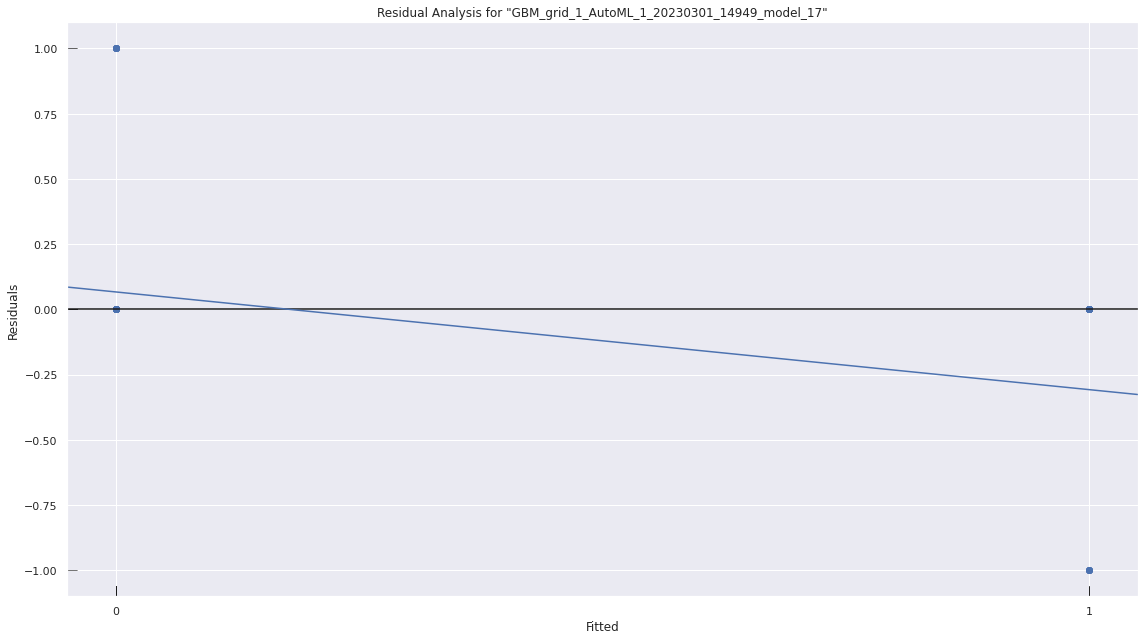

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

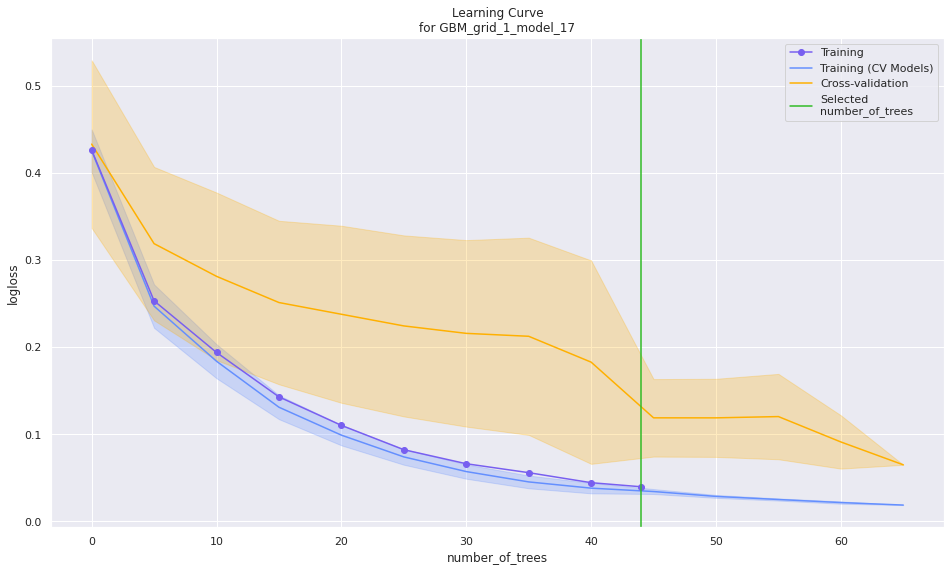

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

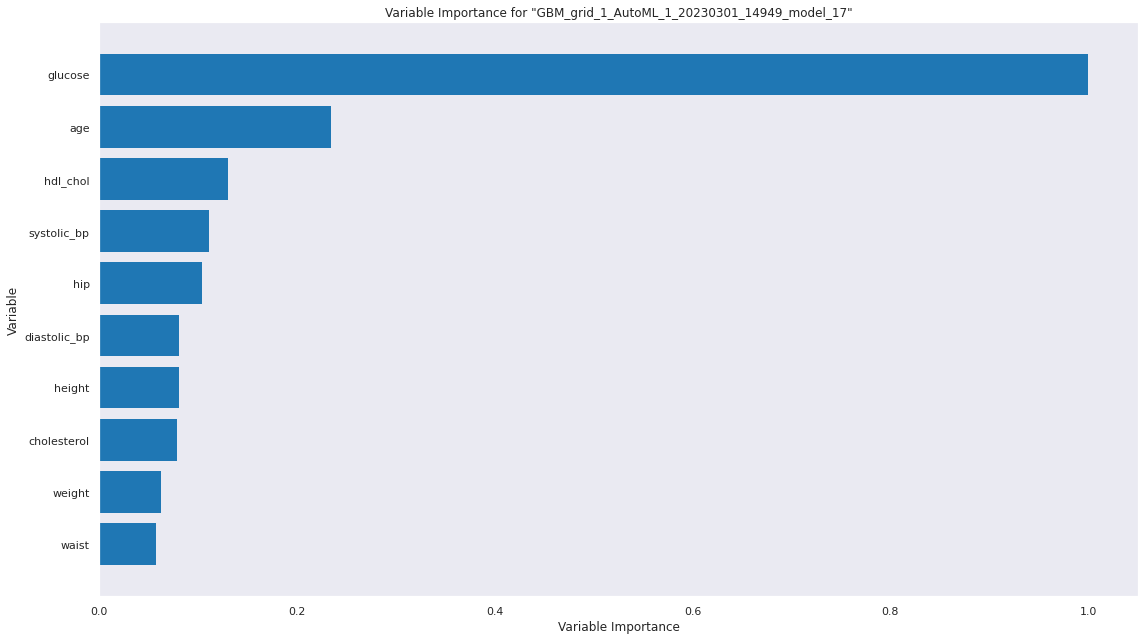

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

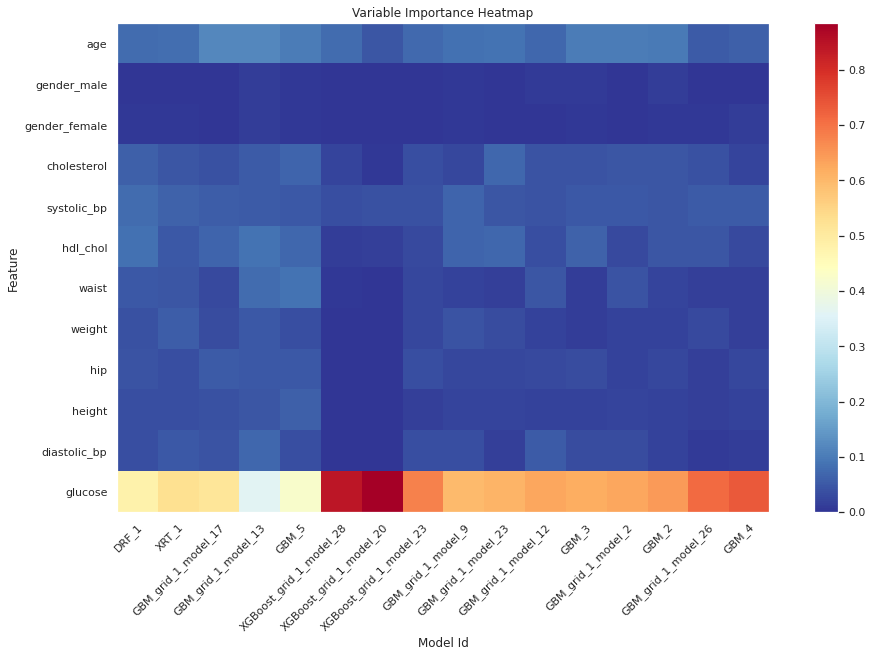

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

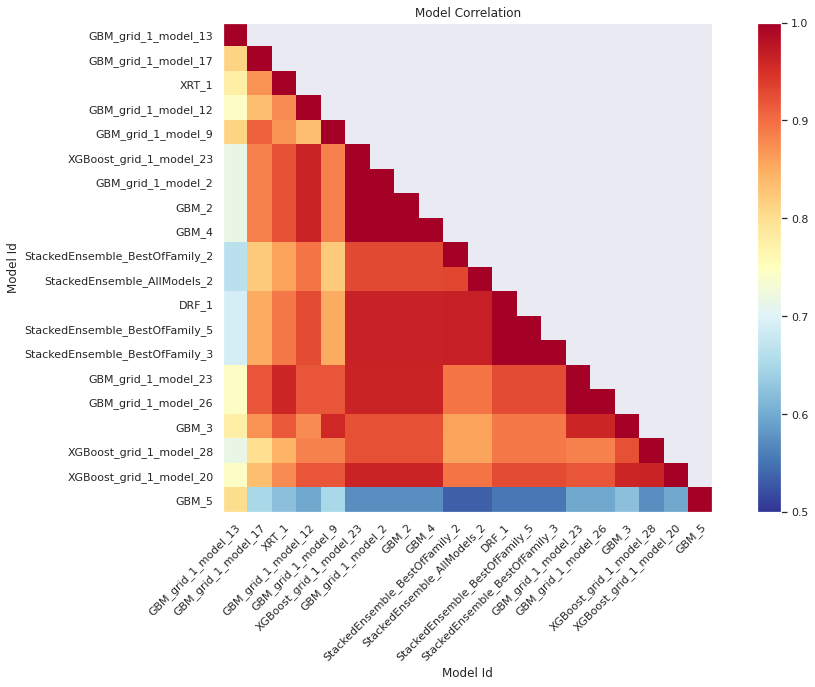

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

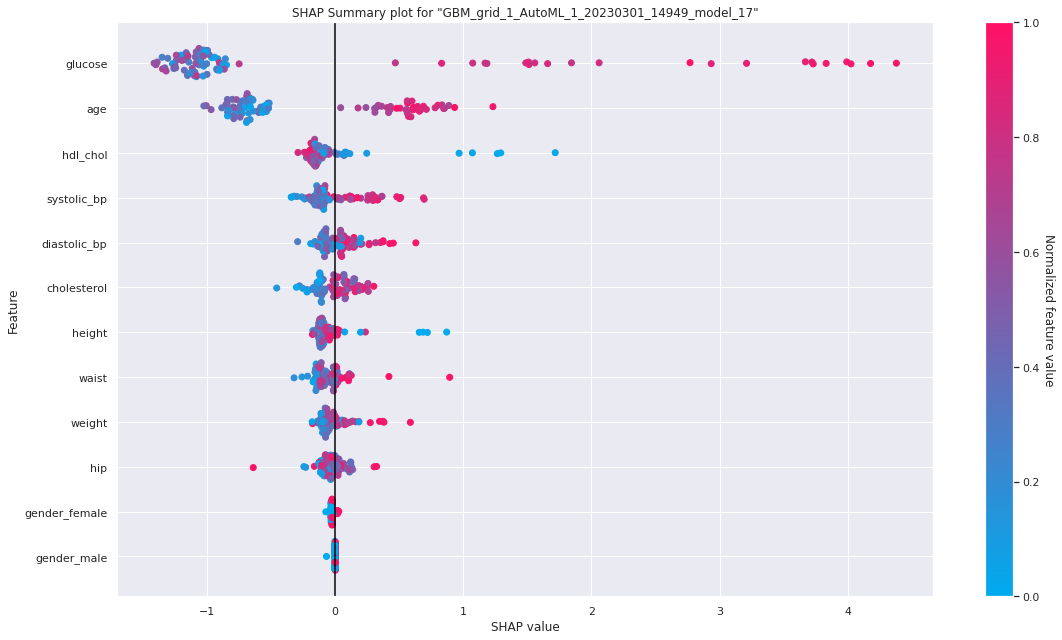

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

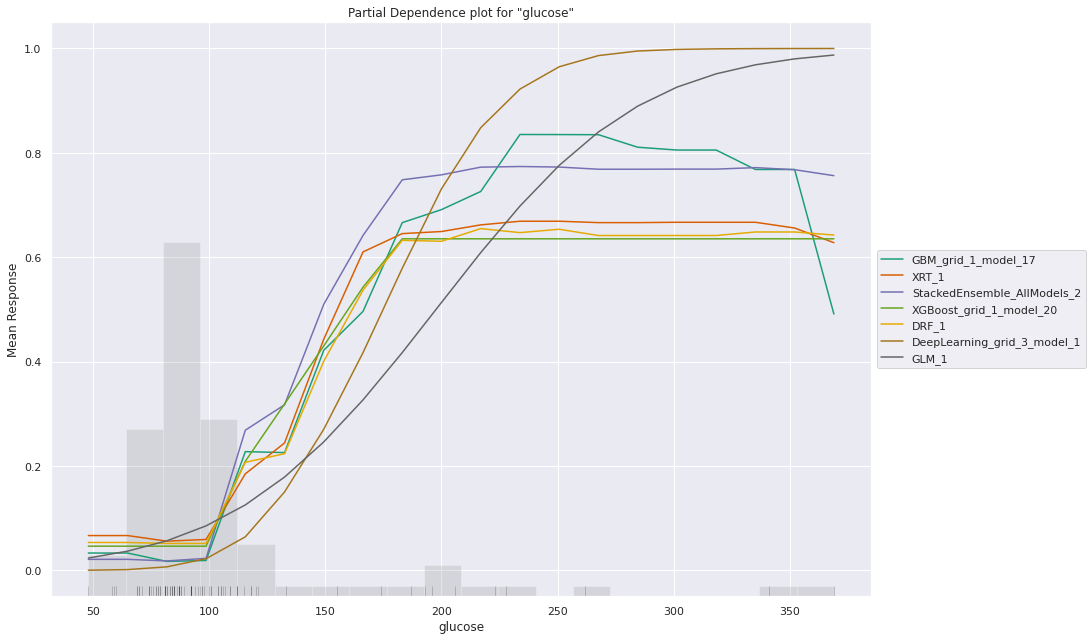

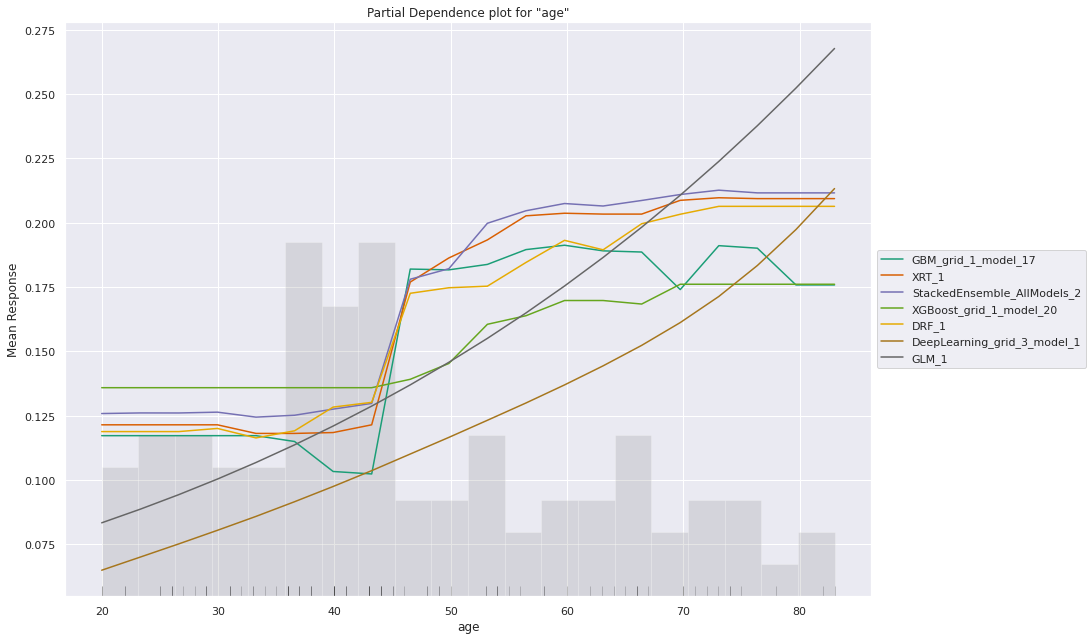

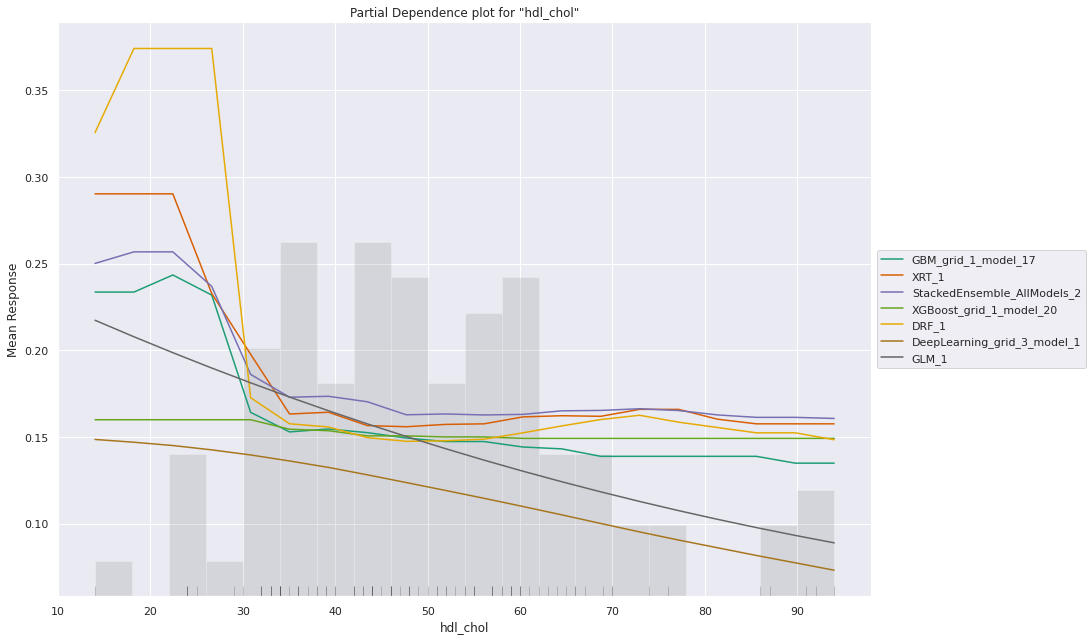

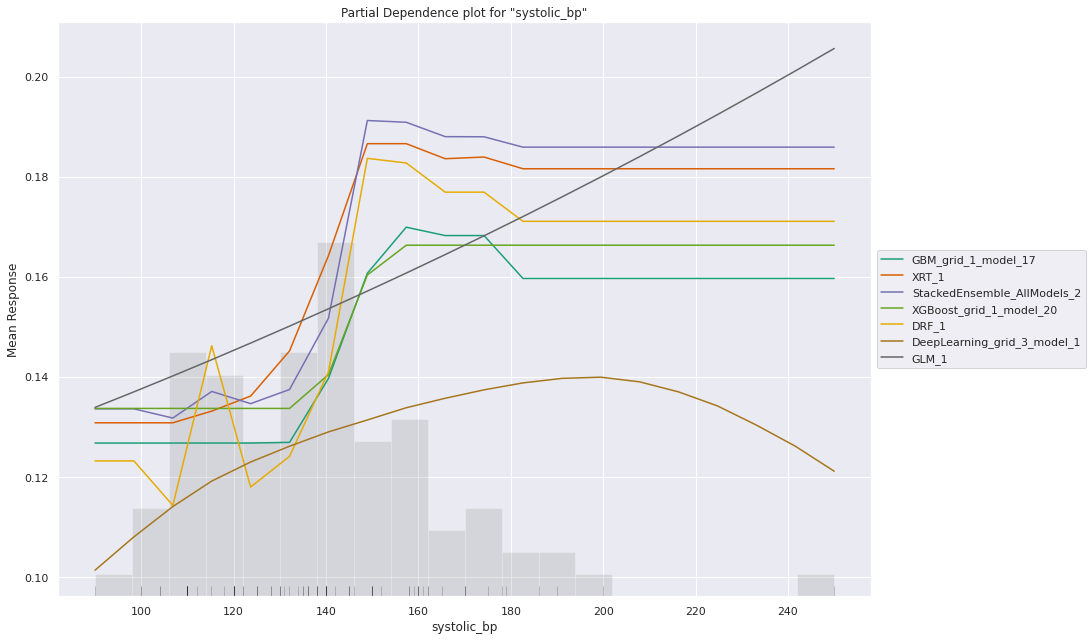

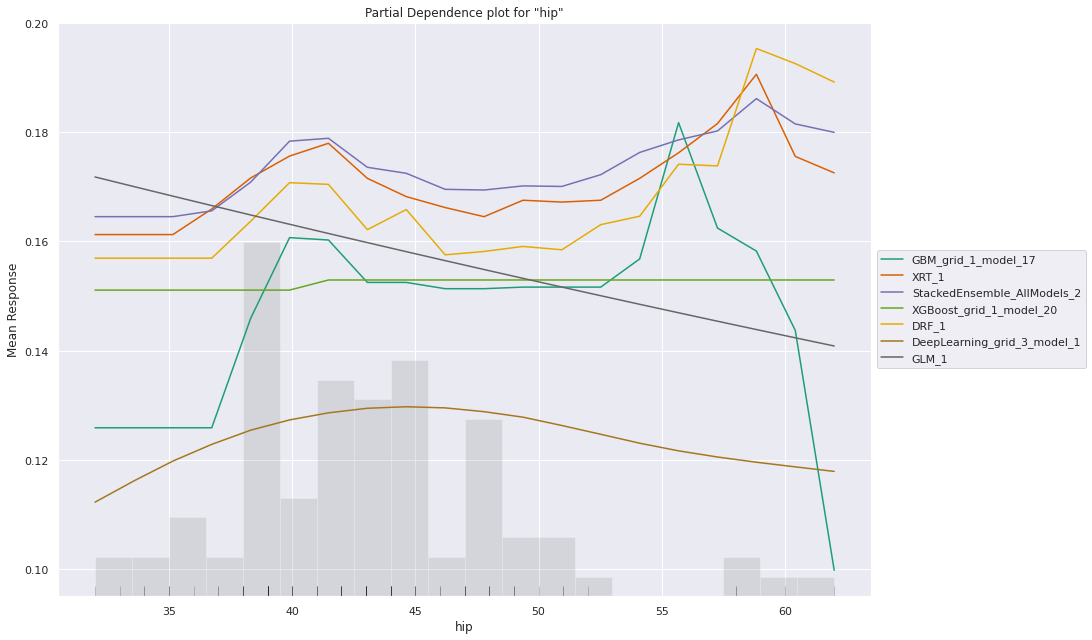

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

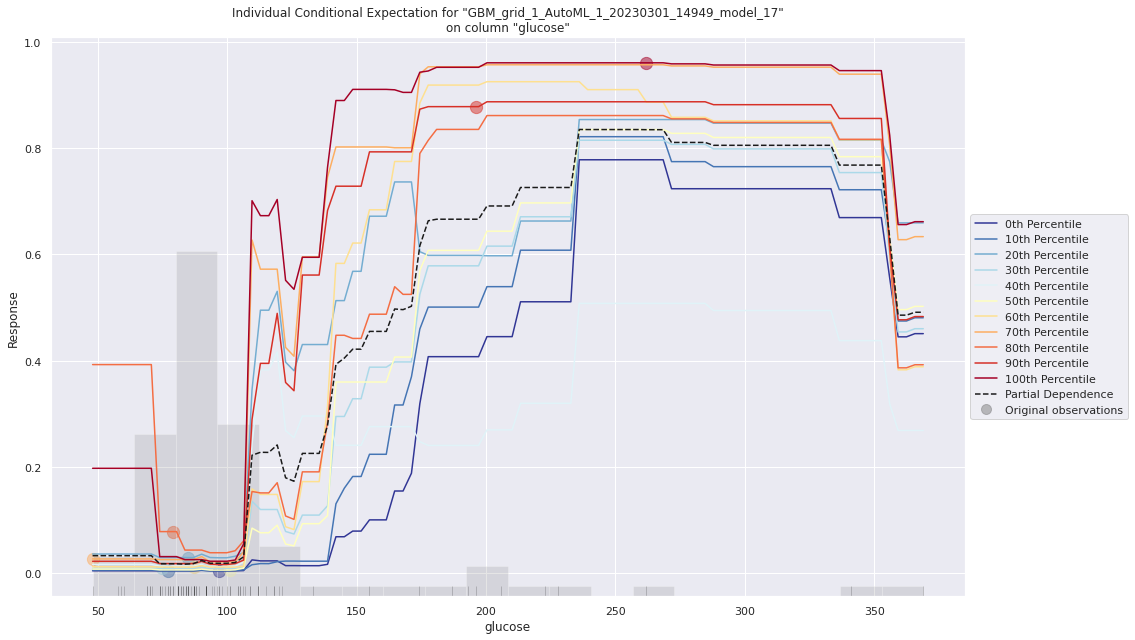

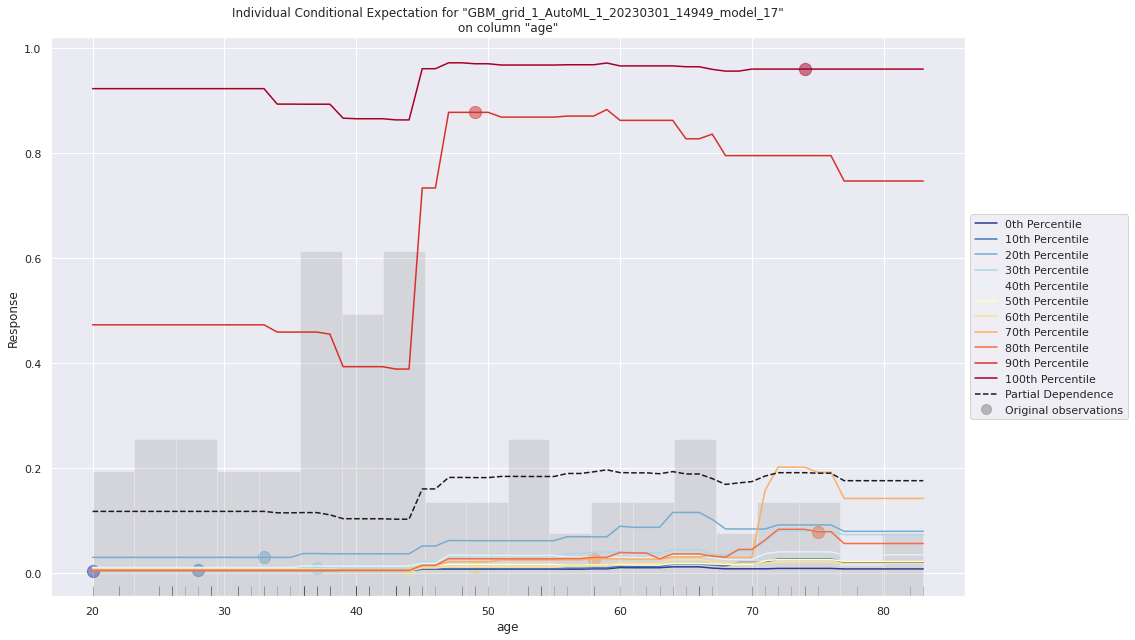

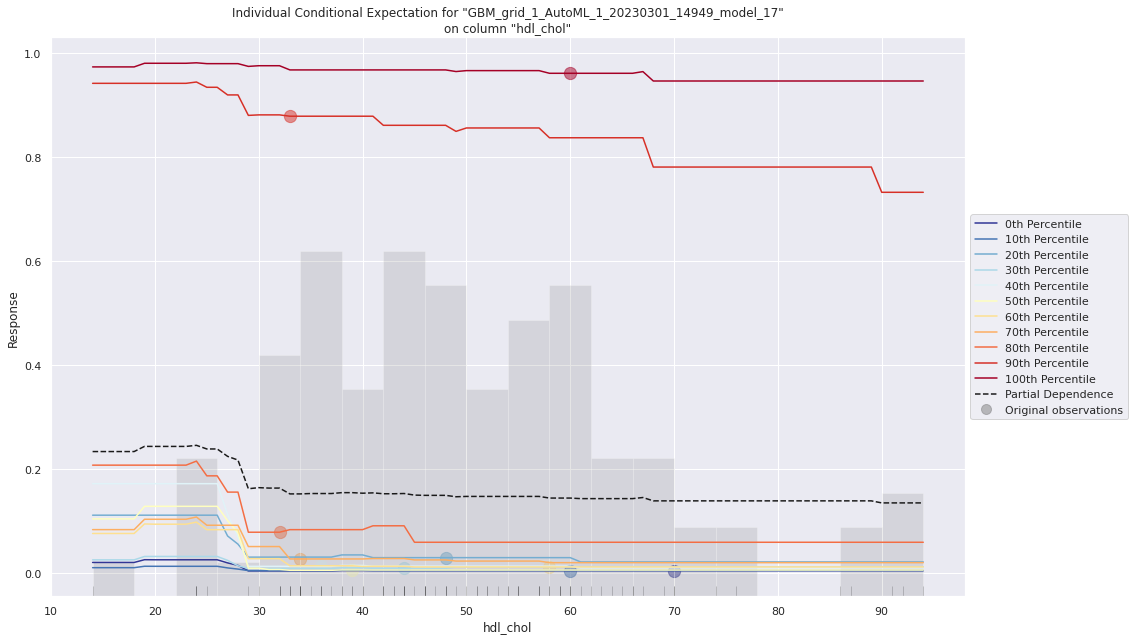

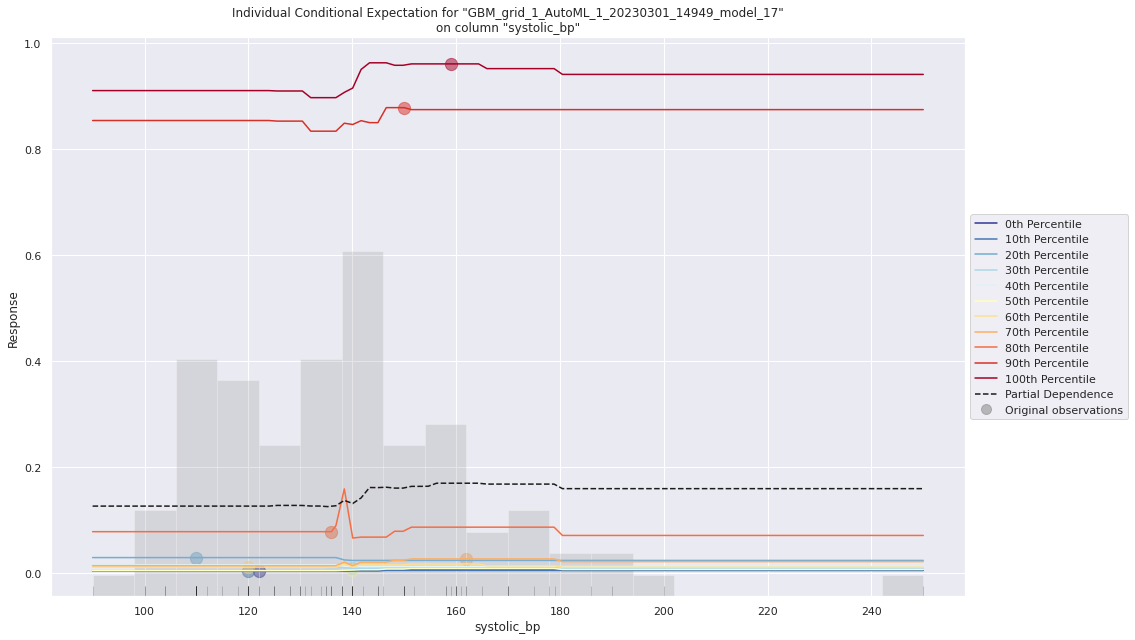

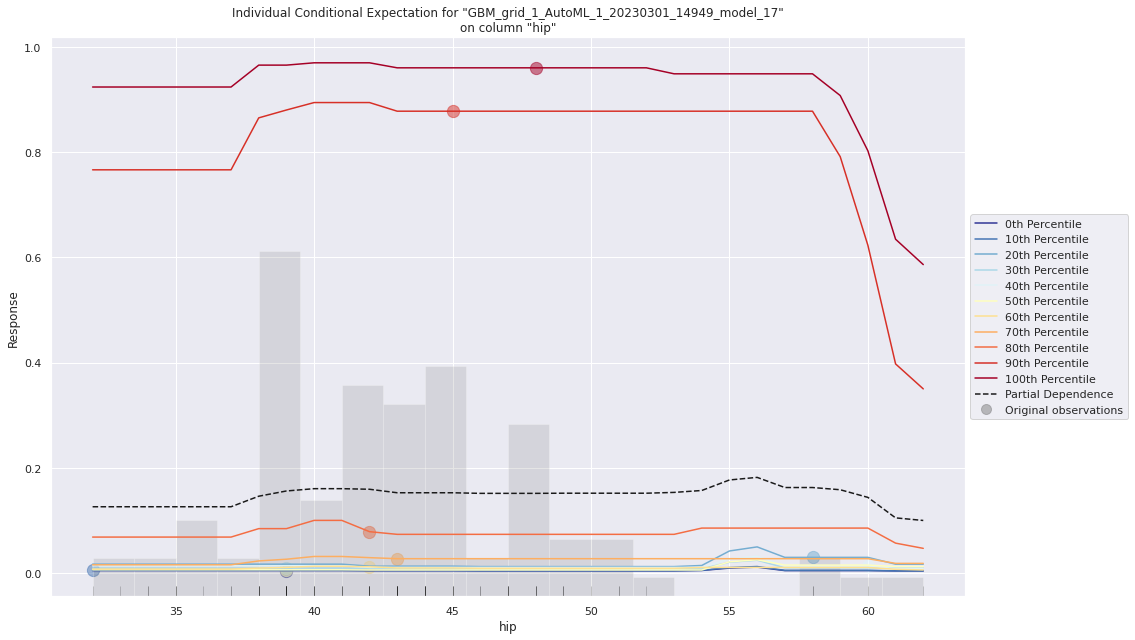

In [559]:
exa = aml.explain(df1_test)

In [560]:
import statsmodels.formula.api as smf  # OLS model Library

In [561]:
import h2o

pandas_df = h2o.as_list(df1)

In [562]:
results = smf.ols(
    "is_diab ~ cholesterol + glucose + hdl_chol + age + height + weight + systolic_bp + diastolic_bp + waist + hip + gender_female + gender_male",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_diab   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     34.33
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.25e-50
Time:                        01:58:34   Log-Likelihood:                -20.737
No. Observations:                 390   AIC:                             65.47
Df Residuals:                     378   BIC:                             113.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3894      0.254     -1.535      0.126      -0.888       0.109
cholesterol       0.0006      0.000      1.950      0.052   -5.05e-06       0.001
glucose           0.0043      0.000     16.021      0.000       0.004       0.005
hdl_chol         -0.0007      0.001     -0.859      0.391      -0.002       0.001
age               0.0016      0.001      1.542      0.124      -0.000       0.004
height         3.826e-05      0.005      0.008      0.994      -0.010       0.010
weight            0.0003      0.001      0.376      0.707      -0.001       0.002
systolic_bp       0.0008      0.001      0.902      0.368      -0.001       0.002
diastolic_bp     -0.0003      0.001     -0.202      0.840      -0.003       0.002
waist             0.0043      0.005      0.827      0.409      -0.006       0.015
hip              -0.0047      0.006     -0.802      0.423      -0.016       0.007
gender_female    -0.1679      0.121     -1.385      0.167      -0.406       0.071
gender_male      -0.2215      0.135     -1.637      0.102      -0.487       0.045
==============================================================================
Omnibus:                      118.680   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.038
Skew:                           1.257   Prob(JB):                    8.78e-113
Kurtosis:                       8.043   Cond. No.                     5.90e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [563]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df1)), int(0.8 * len(df1))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [564]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [565]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [566]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)


In [567]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate     learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  ------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.5                 0.02          2.0          0.9                 gbm_grid2_model_35  0.0760915023175803
     0.7000000000000001  0.03          6.0          1.0                 gbm_grid2_model_6   0.07696441300604277
     0.5                 0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.07787170847804352
     0.5                 0.01          10.0         1.0                 gbm_grid2_model_24  0.07860674127829351
     0.9                 0.03          10.0         0.5                 gbm_grid2_model_21  0.07904797779965993
     0.6000000000000001  0.01          9.0          0.8                 gbm_grid2_model_11  0.07958650199144955
     0.5                 0.1           4.0          0.8                 gbm_grid2_model_33  0.08022165322842226
     1.0                 0.01          2.0          0.5                 gbm_grid2_model_23  0.08030648202319093
     1.0                 0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.08071911738740638
     0.8                 0.03          5.0          0.5                 gbm_grid2_model_12  0.08103641793610047
---  ---                 ---           ---          ---                 ---                 ---
     0.2                 0.02          10.0         0.5                 gbm_grid2_model_25  0.08823499593197685
     0.6000000000000001  0.09          3.0          0.9                 gbm_grid2_model_18  0.08850888943026765
     0.6000000000000001  0.1           4.0          1.0                 gbm_grid2_model_22  0.08907859501354785
     0.9                 0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.08990939571401356
     0.9                 0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.09053784963530558
     0.9                 0.07          4.0          0.9                 gbm_grid2_model_17  0.09077851868531414
     0.9                 0.09          8.0          0.9                 gbm_grid2_model_36  0.09213628332608705
     0.5                 0.1           9.0          1.0                 gbm_grid2_model_7   0.09543422578470809
     0.1                 0.02          9.0          0.8                 gbm_grid2_model_16  0.09717581184529506
     0.4                 0.08          6.0          0.9                 gbm_grid2_model_28  0.09783706123014033
[36 rows x 7 columns]

In [568]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate     learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  ------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.5                 0.02          2.0          0.9                 gbm_grid2_model_35  0.0760915023175803
     0.7000000000000001  0.03          6.0          1.0                 gbm_grid2_model_6   0.07696441300604277
     0.5                 0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.07787170847804352
     0.5                 0.01          10.0         1.0                 gbm_grid2_model_24  0.07860674127829351
     0.9                 0.03          10.0         0.5                 gbm_grid2_model_21  0.07904797779965993
     0.6000000000000001  0.01          9.0          0.8                 gbm_grid2_model_11  0.07958650199144955
     0.5                 0.1           4.0          0.8                 gbm_grid2_model_33  0.08022165322842226
     1.0                 0.01          2.0          0.5                 gbm_grid2_model_23  0.08030648202319093
     1.0                 0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.08071911738740638
     0.8                 0.03          5.0          0.5                 gbm_grid2_model_12  0.08103641793610047
---  ---                 ---           ---          ---                 ---                 ---
     0.2                 0.02          10.0         0.5                 gbm_grid2_model_25  0.08823499593197685
     0.6000000000000001  0.09          3.0          0.9                 gbm_grid2_model_18  0.08850888943026765
     0.6000000000000001  0.1           4.0          1.0                 gbm_grid2_model_22  0.08907859501354785
     0.9                 0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.08990939571401356
     0.9                 0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.09053784963530558
     0.9                 0.07          4.0          0.9                 gbm_grid2_model_17  0.09077851868531414
     0.9                 0.09          8.0          0.9                 gbm_grid2_model_36  0.09213628332608705
     0.5                 0.1           9.0          1.0                 gbm_grid2_model_7   0.09543422578470809
     0.1                 0.02          9.0          0.8                 gbm_grid2_model_16  0.09717581184529506
     0.4                 0.08          6.0          0.9                 gbm_grid2_model_28  0.09783706123014033
[36 rows x 7 columns]

In [569]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [570]:
models = gbm_gridperf2.models

In [571]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [572]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [573]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)


In [574]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.5        0.02          2          0.9           0.076092
1               0.7        0.03          6          1.0           0.076964
2               0.5        0.03          2          0.6           0.077872
3               0.5        0.01         10          1.0           0.078607
4               0.9        0.03         10          0.5           0.079048
5               0.6        0.01          9          0.8           0.079587
6               0.5        0.10          4          0.8           0.080222
7               1.0        0.01          2          0.5           0.080306
8               1.0        0.01          2          0.7           0.080719
9               0.8        0.03          5          0.5           0.081036
10              0.5        0.05          2          0.8           0.081297
11              0.8        0.03          9          0.9           0.081409
12              0.9      

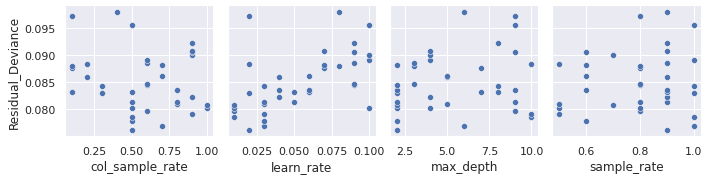

In [575]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# **Hyper Parameter Analysis**

The tuning of four hyperparameters—col sample rate, learn rate, max depth, and sample rate—for an GBM model involved a grid search over a range of values. Below is a summary of that work. A total of 36 hyperparameter combinations were found as a consequence of the search, and the Residual Deviance was determined for each combination as an evaluation metric.

According to the findings, a model with col sample rate of 0.5, learn rate of 0.02, max depth of 2, and sample rate of 1.0 had the lowest Residual Deviance, with a Residual Deviance of 0.076092. The worst-performing models had Residual Deviances above 0.09, while the next best models had Residual Deviances between 0.07 and 0.08.

Overall, the results indicate that hyperparameter adjustment can significantly enhance the performance of an GBM model and that the interaction between col sample rate, learn rate, max depth, and sample rate can have a considerable impact on model performance.

# **Conclusion**

1. To forecast the prediction of diabetes based on specific variables, a predictive model was built using H2O AutoML.
2. Examined how the GLM Model is affected by Elastic Net, LASSO. Lambda_Search and Ridge regularization.
3. Used SHAP summary to research the significance of variables.
4. Used the Random Grid Search Algorithm to carry out the hyperparameter tweaking

# **References**



*   https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
*   https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


*   Professor's Notebook: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb






# **License**

**MIT License**

Copyright (c) 2023 Shreyas Dasari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.